In [ ]:
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

import tensorflow as tf
from tensorflow.python.framework import ops
import h5py

import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn.metrics import classification_report

from keras import utils
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

np.random.seed(1)

In [ ]:
df=pd.read_excel('data_methylation_hm450.xlsx')
df

,Hugo_Symbol,Entrez_Gene_Id,TCGA-A1-A0SB-01,TCGA-A1-A0SE-01,TCGA-A1-A0SF-01,TCGA-A1-A0SH-01,TCGA-A1-A0SI-01,TCGA-A1-A0SJ-01,TCGA-A1-A0SK-01,TCGA-A1-A0SM-01,TCGA-A1-A0SN-01,TCGA-A1-A0SP-01,TCGA-A1-A0SQ-01,TCGA-A2-A04R-01,TCGA-A2-A0CK-01,TCGA-A2-A0CO-01,TCGA-A2-A0CR-01,TCGA-A2-A0CT-01,TCGA-A2-A0EN-01,TCGA-A2-A0EP-01,TCGA-A2-A0EU-01,TCGA-A2-A0ST-01,TCGA-A2-A0SU-01,TCGA-A2-A0SV-01,TCGA-A2-A0SW-01,TCGA-A2-A0SX-01,TCGA-A2-A0SY-01,TCGA-A2-A0T0-01,TCGA-A2-A0T1-01,TCGA-A2-A0T2-01,TCGA-A2-A0T4-01,TCGA-A2-A0T5-01,TCGA-A2-A0T6-01,TCGA-A2-A0T7-01,TCGA-A2-A0YC-01,TCGA-A2-A0YD-01,TCGA-A2-A0YF-01,TCGA-A2-A0YG-01,TCGA-A2-A0YH-01,TCGA-A2-A0YI-01,...,TCGA-EW-A3U0-01,TCGA-EW-A423-01,TCGA-GI-A2C8-01,TCGA-GI-A2C9-01,TCGA-GM-A2D9-01,TCGA-GM-A2DA-01,TCGA-GM-A2DB-01,TCGA-GM-A2DC-01,TCGA-GM-A2DD-01,TCGA-GM-A2DF-01,TCGA-GM-A2DH-01,TCGA-GM-A2DI-01,TCGA-GM-A2DK-01,TCGA-GM-A2DL-01,TCGA-GM-A2DM-01,TCGA-GM-A2DN-01,TCGA-GM-A2DO-01,TCGA-GM-A3NW-01,TCGA-GM-A3NY-01,TCGA-GM-A3XG-01,TCGA-GM-A3XL-01,TCGA-GM-A3XN-01,TCGA-GM-A4E0-01,TCGA-HN-A2NL-01,TCGA-JL-A3YW-01,TCGA-JL-A3YX-01,TCGA-LL-A440-01,TCGA-LL-A441-01,TCGA-LL-A50Y-01,TCGA-LL-A5YL-01,TCGA-LL-A5YM-01,TCGA-LL-A5YN-01,TCGA-LL-A5YO-01,TCGA-LL-A5YP-01,TCGA-LQ-A4E4-01,TCGA-MS-A51U-01,TCGA-OL-A66H-01,TCGA-OL-A66I-01,TCGA-OL-A66J-01,TCGA-OL-A66K-01
0,TDRD6,221400,0.983213,0.869994,0.864608,0.957958,0.977305,0.978353,0.984486,0.985694,0.980318,0.971146,0.959790,0.422615,0.970738,0.834278,0.926629,0.979443,0.890131,0.959075,0.557664,0.959205,0.979377,0.985461,0.643866,0.975610,0.978445,0.966790,0.874414,0.971410,0.981945,0.980904,0.984996,0.977243,0.981118,0.976635,0.863464,0.985085,0.877285,0.963593,...,0.902889,0.984165,0.938607,0.965001,0.977419,0.490169,0.616889,0.903976,0.583548,0.911479,0.956324,0.855003,0.971819,0.954326,0.973826,0.946443,0.909942,0.966434,0.843218,0.970866,0.977175,0.939458,0.950831,0.969894,0.816438,0.961961,0.961064,0.967871,0.944349,0.960213,0.959671,0.898878,0.944549,0.958423,0.844992,0.946486,0.966502,0.974023,0.782723,0.957695
1,NUP210L,91181,0.458652,0.885196,0.863439,0.863568,0.885494,0.878805,0.813438,0.881766,0.789966,0.849071,0.806291,0.910527,0.858789,0.872867,0.877876,0.858016,0.865341,0.813943,0.876550,0.860127,0.740951,0.891137,0.798547,0.790975,0.853243,0.611789,0.877039,0.476376,0.825761,0.795499,0.869470,0.868616,0.843931,0.855951,0.913935,0.879676,0.861071,0.862231,...,0.755596,0.873996,0.807651,0.847018,0.905149,0.886223,0.843991,0.899627,0.875690,0.899372,0.906020,0.919011,0.907975,0.892091,0.582034,0.901600,0.923273,0.875922,0.872761,0.862285,0.866970,0.880910,0.858842,0.640108,0.837315,0.881652,0.818447,0.818918,0.916128,0.842137,0.882626,0.886571,0.826799,0.448607,0.916342,0.887076,0.886722,0.883130,0.879366,0.840461
2,RRS1,23212,0.062012,0.230790,0.208754,0.304995,0.139109,0.644727,0.113945,0.250269,0.183353,0.145637,0.181089,0.076156,0.175846,0.276985,0.270003,0.104746,0.335699,0.337942,0.100721,0.241845,0.141803,0.083611,0.077860,0.098684,0.311731,0.126590,0.450586,0.090717,0.431979,0.094158,0.211372,0.183028,0.127523,0.215302,0.101866,0.109783,0.078270,0.212573,...,0.204997,0.171503,0.137799,0.096089,0.344799,0.222249,0.230360,0.205948,0.228986,0.193025,0.199864,0.339103,0.320301,0.222062,0.101786,0.197419,0.262380,0.400688,0.220813,0.220743,0.073725,0.351104,0.383895,0.058385,0.189096,0.097066,0.394455,0.310623,0.203856,0.658880,0.153321,0.190734,0.275858,0.144426,0.225009,0.199577,0.166006,0.151106,0.181309,0.186117
3,PTPRF,5792,0.049662,0.350278,0.325139,0.427692,0.344594,0.389590,0.055654,0.364525,0.418677,0.328001,0.158788,0.415203,0.330348,0.371707,0.572476,0.477985,0.619205,0.718416,0.220925,0.663779,0.318145,0.427893,0.341824,0.399957,0.318773,0.350047,0.573322,0.169338,0.545103,0.297875,0.392209,0.318680,0.448017,0.634518,0.278068,0.250702,0.486214,0.406600,...,0.536298,0.215143,0.472613,0.252776,0.294267,0.381614,0.457672,0.285531,0.557071,0.508931,0.411310,0.596270,0.432307,0.430410,0.343166,0.513833,0.643470,0.307169,0.363863,0.282471,0.337020,0.453478,0

In [ ]:
df.drop(['Hugo_Symbol'], axis=1, inplace=True)
df.drop(['Entrez_Gene_Id'], axis=1, inplace=True)
df

,TCGA-A1-A0SB-01,TCGA-A1-A0SE-01,TCGA-A1-A0SF-01,TCGA-A1-A0SH-01,TCGA-A1-A0SI-01,TCGA-A1-A0SJ-01,TCGA-A1-A0SK-01,TCGA-A1-A0SM-01,TCGA-A1-A0SN-01,TCGA-A1-A0SP-01,TCGA-A1-A0SQ-01,TCGA-A2-A04R-01,TCGA-A2-A0CK-01,TCGA-A2-A0CO-01,TCGA-A2-A0CR-01,TCGA-A2-A0CT-01,TCGA-A2-A0EN-01,TCGA-A2-A0EP-01,TCGA-A2-A0EU-01,TCGA-A2-A0ST-01,TCGA-A2-A0SU-01,TCGA-A2-A0SV-01,TCGA-A2-A0SW-01,TCGA-A2-A0SX-01,TCGA-A2-A0SY-01,TCGA-A2-A0T0-01,TCGA-A2-A0T1-01,TCGA-A2-A0T2-01,TCGA-A2-A0T4-01,TCGA-A2-A0T5-01,TCGA-A2-A0T6-01,TCGA-A2-A0T7-01,TCGA-A2-A0YC-01,TCGA-A2-A0YD-01,TCGA-A2-A0YF-01,TCGA-A2-A0YG-01,TCGA-A2-A0YH-01,TCGA-A2-A0YI-01,TCGA-A2-A0YK-01,TCGA-A2-A0YL-01,...,TCGA-EW-A3U0-01,TCGA-EW-A423-01,TCGA-GI-A2C8-01,TCGA-GI-A2C9-01,TCGA-GM-A2D9-01,TCGA-GM-A2DA-01,TCGA-GM-A2DB-01,TCGA-GM-A2DC-01,TCGA-GM-A2DD-01,TCGA-GM-A2DF-01,TCGA-GM-A2DH-01,TCGA-GM-A2DI-01,TCGA-GM-A2DK-01,TCGA-GM-A2DL-01,TCGA-GM-A2DM-01,TCGA-GM-A2DN-01,TCGA-GM-A2DO-01,TCGA-GM-A3NW-01,TCGA-GM-A3NY-01,TCGA-GM-A3XG-01,TCGA-GM-A3XL-01,TCGA-GM-A3XN-01,TCGA-GM-A4E0-01,TCGA-HN-A2NL-01,TCGA-JL-A3YW-01,TCGA-JL-A3YX-01,TCGA-LL-A440-01,TCGA-LL-A441-01,TCGA-LL-A50Y-01,TCGA-LL-A5YL-01,TCGA-LL-A5YM-01,TCGA-LL-A5YN-01,TCGA-LL-A5YO-01,TCGA-LL-A5YP-01,TCGA-LQ-A4E4-01,TCGA-MS-A51U-01,TCGA-OL-A66H-01,TCGA-OL-A66I-01,TCGA-OL-A66J-01,TCGA-OL-A66K-01
0,0.983213,0.869994,0.864608,0.957958,0.977305,0.978353,0.984486,0.985694,0.980318,0.971146,0.959790,0.422615,0.970738,0.834278,0.926629,0.979443,0.890131,0.959075,0.557664,0.959205,0.979377,0.985461,0.643866,0.975610,0.978445,0.966790,0.874414,0.971410,0.981945,0.980904,0.984996,0.977243,0.981118,0.976635,0.863464,0.985085,0.877285,0.963593,0.946497,0.976005,...,0.902889,0.984165,0.938607,0.965001,0.977419,0.490169,0.616889,0.903976,0.583548,0.911479,0.956324,0.855003,0.971819,0.954326,0.973826,0.946443,0.909942,0.966434,0.843218,0.970866,0.977175,0.939458,0.950831,0.969894,0.816438,0.961961,0.961064,0.967871,0.944349,0.960213,0.959671,0.898878,0.944549,0.958423,0.844992,0.946486,0.966502,0.974023,0.782723,0.957695
1,0.458652,0.885196,0.863439,0.863568,0.885494,0.878805,0.813438,0.881766,0.789966,0.849071,0.806291,0.910527,0.858789,0.872867,0.877876,0.858016,0.865341,0.813943,0.876550,0.860127,0.740951,0.891137,0.798547,0.790975,0.853243,0.611789,0.877039,0.476376,0.825761,0.795499,0.869470,0.868616,0.843931,0.855951,0.913935,0.879676,0.861071,0.862231,0.826899,0.820267,...,0.755596,0.873996,0.807651,0.847018,0.905149,0.886223,0.843991,0.899627,0.875690,0.899372,0.906020,0.919011,0.907975,0.892091,0.582034,0.901600,0.923273,0.875922,0.872761,0.862285,0.866970,0.880910,0.858842,0.640108,0.837315,0.881652,0.818447,0.818918,0.916128,0.842137,0.882626,0.886571,0.826799,0.448607,0.916342,0.887076,0.886722,0.883130,0.879366,0.840461
2,0.062012,0.230790,0.208754,0.304995,0.139109,0.644727,0.113945,0.250269,0.183353,0.145637,0.181089,0.076156,0.175846,0.276985,0.270003,0.104746,0.335699,0.337942,0.100721,0.241845,0.141803,0.083611,0.077860,0.098684,0.311731,0.126590,0.450586,0.090717,0.431979,0.094158,0.211372,0.183028,0.127523,0.215302,0.101866,0.109783,0.078270,0.212573,0.267502,0.169678,...,0.204997,0.171503,0.137799,0.096089,0.344799,0.222249,0.230360,0.205948,0.228986,0.193025,0.199864,0.339103,0.320301,0.222062,0.101786,0.197419,0.262380,0.400688,0.220813,0.220743,0.073725,0.351104,0.383895,0.058385,0.189096,0.097066,0.394455,0.310623,0.203856,0.658880,0.153321,0.190734,0.275858,0.144426,0.225009,0.199577,0.166006,0.151106,0.181309,0.186117
3,0.049662,0.350278,0.325139,0.427692,0.344594,0.389590,0.055654,0.364525,0.418677,0.328001,0.158788,0.415203,0.330348,0.371707,0.572476,0.477985,0.619205,0.718416,0.220925,0.663779,0.318145,0.427893,0.341824,0.399957,0.318773,0.350047,0.573322,0.169338,0.545103,0.297875,0.392209,0.318680,0.448017,0.634518,0.278068,0.250702,0.486214,0.406600,0.433821,0.286393,...,0.536298,0.215143,0.472613,0.252776,0.294267,0.381614,0.457672,0.285531,0.557071,0.508931,0.411310,0.596270,0.432307,0.430410,0.343166,0.513833,0.643470,0.307169,0.363863,

In [ ]:
df_1=df.transpose()
df_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16080,16081,16082,16083,16084,16085,16086,16087,16088,16089,16090,16091,16092,16093,16094,16095,16096,16097,16098,16099,16100,16101,16102,16103,16104,16105,16106,16107,16108,16109,16110,16111,16112,16113,16114,16115,16116,16117,16118,16119
TCGA-A1-A0SB-01,0.983213,0.458652,0.062012,0.049662,0.069181,0.017553,0.061044,0.041202,0.092110,0.278039,0.034175,0.843818,0.026500,0.031728,0.939385,0.350391,0.012990,0.079319,0.845979,0.023918,0.674603,0.044092,0.025978,0.292852,0.015010,0.495859,0.047247,0.060915,0.028503,0.256211,0.012474,0.216248,0.023797,0.621425,0.030768,0.043387,0.472610,0.868774,0.793569,0.801918,...,0.040012,0.057113,0.089593,0.060158,0.031904,0.044057,0.045014,0.038939,0.062487,0.040771,0.048219,0.061124,0.046661,0.032895,0.027352,0.029385,0.049581,0.129340,0.053800,0.067028,0.022387,0.034054,0.035073,0.116473,0.062986,0.049501,0.043200,0.040185,0.027405,0.045772,0.076986,0.047961,0.033551,0.063882,0.066814,0.036657,0.047536,0.057515,0.033011,0.038733
TCGA-A1-A0SE-01,0.869994,0.885196,0.230790,0.350278,0.268820,0.015608,0.379402,0.574879,0.469220,0.516614,0.048169,0.527323,0.046573,0.059015,0.951886,0.808382,0.015321,0.157478,0.870344,0.025803,0.739969,0.061122,0.030041,0.865731,0.015979,0.814691,0.065842,0.214993,0.496471,0.410527,0.029739,0.577758,0.024357,0.724257,0.426281,0.055423,0.834699,0.934645,0.865637,0.943434,...,0.068489,0.116235,0.169171,0.162937,0.038427,0.060642,0.084681,0.072507,0.138902,0.045122,0.101093,0.113884,0.105794,0.062619,0.038532,0.034937,0.089029,0.155588,0.067167,0.167058,0.032018,0.039500,0.058803,0.172698,0.080716,0.084900,0.048604,0.070060,0.058253,0.058830,0.113193,0.040010,0.055429,0.134977,0.102555,0.052070,0.066688,0.197544,0.039243,0.043382
TCGA-A1-A0SF-01,0.864608,0.863439,0.208754,0.325139,0.266039,0.013206,0.138424,0.450131,0.365820,0.465906,0.026816,0.591732,0.023753,0.104990,0.947848,0.856150,0.011893,0.166092,0.863111,0.023839,0.772174,0.039838,0.022763,0.911198,0.012539,0.757362,0.029462,0.054491,0.331390,0.293784,0.217129,0.470039,0.017259,0.725869,0.561979,0.037402,0.717191,0.937308,0.586585,0.908118,...,0.040361,0.052906,0.081503,0.065278,0.046776,0.056468,0.038940,0.040225,0.060675,0.037545,0.060505,0.073386,0.061051,0.037540,0.026661,0.034201,0.052835,0.076865,0.073137,0.092076,0.024804,0.042092,0.030052,0.102127,0.059557,0.049050,0.041790,0.048094,0.071025,0.039749,0.075043,0.034738,0.040366,0.065048,0.070795,0.040393,0.065623,0.071879,0.028650,0.031683
TCGA-A1-A0SH-01,0.957958,0.863568,0.304995,0.427692,0.219565,0.014885,0.192077,0.641987,0.527452,0.649930,0.043871,0.431105,0.039376,0.180393,0.946609,0.885184,0.018479,0.136830,0.812953,0.024235,0.762432,0.051533,0.021341,0.908143,0.014613,0.865092,0.046276,0.162546,0.068130,0.379152,0.018773,0.530767,0.023409,0.647156,0.078274,0.070098,0.871581,0.920108,0.872646,0.906102,...,0.068070,0.125171,0.116990,0.141693,0.044330,0.082639,0.071128,0.064416,0.087844,0.059379,0.106135,0.122964,0.079400,0.049105,0.035064,0.043476,0.157445,0.161509,0.112005,0.186573,0.027868,0.049303,0.070880,0.226733,0.104207,0.073576,0.057286,0.060264,0.062351,0.058254,0.123731,0.055978,0.061103,0.144078,0.110075,0.045121,0.068080,0.201118,0.052026,0.058523
TCGA-A1-A0SI-01,0.977305,0.885494,0.139109,0.344594,0.230685,0.013238,0.411809,0.423616,0.381030,0.587499,0.033351,0.606760,0.024283,0.223043,0.943979,0.899960,0.015997,0.257290,0.859839,0.031149,0.838331,0.063268,0.019169,0.484228,0.013129,0.853540,0.053466,0.050397,0.185130,0.414610,0.033487,0.491701,0.023245,0.680840,0.586751,0.048267,0.744730,0.884468,0.710802,0.919129,...,0.034182,0.064807,0.074915,0.065205,0.040369,0.050967,0.049941,0.041524,0.066320,0.033625,0.076535,0.070628,0.095290,0.036575,0.027766,0.028304,0.052260,0.069543,0.055629,0.077908,0.026093,0.043142,0.040178,0.124750,0.060139,0.071293,0.051532,0.056561,0.035826,0.046761,0.079383,0.046396,0.047030,0.082418

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
np.sum(df_1.isnull())

0        0
1        0
2        0
3        0
4        0
        ..
16115    0
16116    1
16117    4
16118    0
16119    0
Length: 16120, dtype: int64

In [ ]:
mean=np.nanmean(df_1,axis=1)
mean

array([0.34168515, 0.41546365, 0.39076947, 0.41308024, 0.38163744,
       0.43428371, 0.36746117, 0.4457602 , 0.4324795 , 0.40166008,
       0.36921705, 0.43780083, 0.40097253, 0.40966408, 0.42045915,
       0.46604311, 0.43239963, 0.42122685, 0.39317135, 0.41366023,
       0.37590307, 0.40024408, 0.39009798, 0.38548408, 0.43436692,
       0.37039214, 0.41148274, 0.39523792, 0.43907132, 0.4054578 ,
       0.43825034, 0.40873019, 0.43602921, 0.43608202, 0.40894472,
       0.45797574, 0.36002816, 0.43678462, 0.41627995, 0.38744725,
       0.40684807, 0.3839699 , 0.45428708, 0.43184435, 0.40005565,
       0.43301138, 0.38505098, 0.39619723, 0.43195222, 0.38338994,
       0.40880266, 0.42719958, 0.41032136, 0.42159244, 0.40099858,
       0.41821439, 0.42298607, 0.425898  , 0.40833026, 0.42438265,
       0.39748082, 0.33657944, 0.42949859, 0.39785397, 0.41699533,
       0.39508578, 0.40477009, 0.37442027, 0.42023339, 0.39583949,
       0.40479993, 0.37509157, 0.42968424, 0.39530766, 0.43231

In [ ]:
for i in range(0,553):
    for j in range(0,16120):
        if pd.isnull(df_1.iloc[i,j])==True:
            df_1.iloc[i,j]=mean[i]           

In [ ]:
np.sum(df_1.isnull())

0        0
1        0
2        0
3        0
4        0
        ..
16115    0
16116    0
16117    0
16118    0
16119    0
Length: 16120, dtype: int64

In [ ]:
pca = PCA(n_components=50)
pca.fit(df_1)
PCA(n_components=50)
print(pca.explained_variance_ratio_)

[0.17739565 0.09006974 0.04401443 0.04063588 0.02246694 0.01936374
 0.01796788 0.01683941 0.01395033 0.01089832 0.00966253 0.00907511
 0.00893451 0.00809032 0.00772603 0.00698365 0.00653659 0.00610667
 0.00542351 0.00506365 0.00495116 0.00485748 0.0046378  0.00442256
 0.00427182 0.00418643 0.00395483 0.00384775 0.00381622 0.00373026
 0.0035937  0.00352329 0.00339496 0.00332243 0.00317778 0.00313545
 0.00308497 0.00300007 0.00293628 0.00283707 0.00281508 0.00275598
 0.00273189 0.00269483 0.00260017 0.00253218 0.00248629 0.00244416
 0.00238367 0.00234517]


In [ ]:
df_1=pca.transform(df_1)

In [ ]:
df_1=pd.DataFrame(df_1)

In [ ]:
df_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,10.765596,-11.282662,7.499593,-4.393978,1.661650,-0.413686,3.941925,2.946847,1.555718,0.222815,3.825913,2.582591,0.832143,-0.284738,0.571627,1.734883,1.018514,-1.310977,2.407212,-0.482043,-1.153146,2.155647,-1.299980,-0.218991,0.809786,-0.222289,0.250940,1.282137,0.630623,-2.171161,1.989196,2.299964,-1.669426,0.650240,0.662152,1.427772,1.525599,1.296690,-0.099074,-0.626055,-0.293601,0.121599,-1.154277,-0.368682,0.280786,0.289918,0.523621,-0.294492,-0.402843,0.463381
1,-1.618817,-0.045712,0.113850,-3.455811,-0.317711,2.425813,3.144005,-0.574117,1.416014,-1.437828,1.304972,0.413516,-1.250775,0.107864,0.105554,-0.211809,1.110198,0.186643,-0.757569,-1.333647,0.822298,1.104728,0.004482,0.434107,-0.159056,0.035383,-0.682112,0.214260,0.188244,-0.968167,0.155325,0.112759,-0.599375,1.073533,0.326042,-0.428563,0.063984,0.687707,-0.041683,-0.292297,-0.084542,0.190245,0.086901,0.376583,-0.241046,0.437770,0.255694,-0.049321,-0.129949,-0.219959
2,-1.544806,-2.563277,-0.939348,0.917513,-2.059243,-2.158641,0.888356,0.116705,1.596757,-0.287801,1.363922,-0.045687,-1.271581,1.202750,0.270877,1.220313,0.071458,-0.733549,-1.413293,-1.048814,0.400170,-0.954935,-0.112952,0.861235,0.476662,0.553530,-0.312943,0.853315,0.737556,-0.427494,0.908943,0.723374,-0.950037,0.309970,1.106346,-0.972170,0.269348,-0.257450,0.664774,0.395877,-0.675782,-0.220789,0.374252,-0.597296,-0.498707,0.212610,0.565393,-0.085351,0.109849,1.097531
3,0.865656,0.664760,-1.148303,-3.318841,0.442149,1.395756,4.245760,0.113873,1.495146,-0.553448,-1.662323,-0.125000,-1.426104,-0.614984,1.145855,-0.353241,-1.376348,1.624296,-0.177530,-0.573976,0.178110,0.500172,1.482424,-0.223656,0.368564,-0.679238,0.395547,0.225101,0.408395,0.115177,0.316002,0.010596,-0.521122,0.940893,-0.514697,0.105796,-0.037584,-0.196360,-0.112255,0.022962,0.341361,-0.219974,0.284574,-0.209927,-0.191972,0.247366,0.149774,-0.926625,0.267115,0.263008
4,0.875460,-4.248211,-1.121184,1.158014,-3.516208,0.102078,0.074946,1.704143,-1.140488,0.084999,-0.540297,-1.460232,-1.288435,0.697773,0.082734,0.137743,0.411089,-0.110950,-0.314264,-0.052239,0.028295,-0.676268,0.863690,0.732314,-1.027840,-0.859177,0.676335,-0.055804,0.376308,-0.705775,-0.380184,0.422874,-0.138716,-0.027798,0.049474,-0.788869,0.055441,0.359516,-0.195768,-1.171418,0.021741,0.933582,0.072629,0.353423,0.405587,-0.177357,0.006729,1.027335,0.234265,0.078447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,2.297109,-1.039773,-1.208558,-3.181355,0.222308,0.263222,1.598671,1.163765,0.387130,0.077641,0.948857,-0.400201,-0.557901,0.048058,-0.422226,-0.675927,1.116198,-0.069280,-0.337335,-0.544666,-0.907329,-0.225652,-0.604681,-0.048912,-0.471979,0.212005,-0.381486,-0.343332,-0.623827,-0.243337,0.210944,-1.076691,0.831585,0.171119,-0.494398,0.422777,-0.226744,-0.377217,1.004657,0.623022,0.192678,0.341181,0.102960,-0.611849,0.067865,-0.540628,-0.191855,-0.480745,0.058541,0.185773
549,-1.242311,-0.736357,-3.322348,-1.207218,3.650318,0.593882,-1.818835,-1.428616,-2.699252,-1.039543,-0.807870,-0.234894,1.104847,0.879893,0.357922,1.349682,0.014382,0.527083,-1.196410,0.263688,-0.242450,1.578714,1.988674,-0.460451,-0.743378,-0.785856,-0.446869,-1.171602,-1.477586,-0.472994,0.009324,0.154622,-0.399633,-1.415349,-0.336382,0.073944,-0.090927,-0.868324,0.438804,0.955177,-0.798211,0.786487,-0.074724,-0.414600,-0.681994,0.904015,-0.742940,-0.302280,-0.193761,0.194230
550,11.620609,6.104398,0.610271,1.699135,0.162424,-0.886674,-2.771627,1.370461,-0.769303,-1.701239,0.263832,0.746368,-0.996303,-0.990852,-0.529751,0.620405,-0.461615,0.244417,-0.533444,0.406260,0.520401,0.166730,-1.351185,0.308200,-0.812730,-1.158834,-0.759797,0.321838,-0.211116,-0.026493,0.592600,-0.493393,-0.751624,

In [ ]:
id=df.columns[0:553]
id

Index(['TCGA-A1-A0SB-01', 'TCGA-A1-A0SE-01', 'TCGA-A1-A0SF-01',
       'TCGA-A1-A0SH-01', 'TCGA-A1-A0SI-01', 'TCGA-A1-A0SJ-01',
       'TCGA-A1-A0SK-01', 'TCGA-A1-A0SM-01', 'TCGA-A1-A0SN-01',
       'TCGA-A1-A0SP-01',
       ...
       'TCGA-LL-A5YM-01', 'TCGA-LL-A5YN-01', 'TCGA-LL-A5YO-01',
       'TCGA-LL-A5YP-01', 'TCGA-LQ-A4E4-01', 'TCGA-MS-A51U-01',
       'TCGA-OL-A66H-01', 'TCGA-OL-A66I-01', 'TCGA-OL-A66J-01',
       'TCGA-OL-A66K-01'],
      dtype='object', length=553)

In [ ]:
cases_her2pos=pd.read_excel('cases_her2pos.xlsx')
cases_her2pos

,TCGA-BH-A18R-01,TCGA-A8-A07R-01,TCGA-AN-A0FX-01,TCGA-BH-A18Q-01,TCGA-BH-A18T-01,TCGA-E9-A1ND-01,TCGA-E9-A22G-01,TCGA-A2-A0EQ-01,TCGA-A2-A0T1-01,TCGA-A2-A3XZ-01,TCGA-A8-A08X-01,TCGA-AN-A0FV-01,TCGA-C8-A12P-01,TCGA-C8-A12Q-01,TCGA-C8-A135-01,TCGA-C8-A1HK-01,TCGA-C8-A278-01,TCGA-D8-A1JA-01,TCGA-D8-A1XT-01,TCGA-E2-A14P-01,TCGA-E2-A1B0-01,TCGA-E2-A1LB-01,TCGA-E2-A1LE-01,TCGA-A8-A0A7-01,TCGA-C8-A137-01,TCGA-AN-A0FL-01,TCGA-A2-A04W-01,TCGA-BH-A0EE-01,TCGA-BH-A1EN-01,TCGA-C8-A12Z-01,TCGA-AN-A0FJ-01,TCGA-A7-A4SF-01,TCGA-A8-A07I-01,TCGA-A8-A08B-01,TCGA-AC-A23H-01,TCGA-E2-A152-01,TCGA-A1-A0SM-01,TCGA-AN-A0FZ-01,TCGA-AQ-A04L-01,TCGA-A2-A0EY-01,...,TCGA-A8-A08S-01,TCGA-A8-A09I-01,TCGA-A8-A09N-01,TCGA-AN-A0AJ-01,TCGA-BH-A0AU-01,TCGA-BH-A0DD-01,TCGA-BH-A18U-01,TCGA-BH-A1F2-01,TCGA-BH-A1F8-01,TCGA-BH-A202-01,TCGA-D8-A27N-01,TCGA-E9-A1NA-01,TCGA-E9-A22D-01,TCGA-E9-A22H-01,TCGA-A8-A08H-01,TCGA-AC-A23G-01,TCGA-AC-A2FB-01,TCGA-AC-A3TN-01,TCGA-E9-A295-01,TCGA-EW-A1IW-01,TCGA-BH-A42T-01,TCGA-AC-A3YI-01,TCGA-JL-A3YW-01,TCGA-E9-A3X8-01,TCGA-A8-A07B-01,TCGA-A8-A090-01,TCGA-A8-A097-01,TCGA-A8-A099-01,TCGA-AN-A0FN-01,TCGA-AQ-A0Y5-01,TCGA-EW-A1J3-01,TCGA-C8-A3M8-01,TCGA-D8-A1X5-01,TCGA-E9-A22E-01,TCGA-D8-A1XJ-01,TCGA-AR-A0TX-01,TCGA-AN-A0FT-01,TCGA-BH-A18M-01,TCGA-JL-A3YX-01,TCGA-D8-A1XS-01


In [ ]:
her2pos=cases_her2pos.columns[0:120]
her2pos

Index(['TCGA-BH-A18R-01', 'TCGA-A8-A07R-01', 'TCGA-AN-A0FX-01',
       'TCGA-BH-A18Q-01', 'TCGA-BH-A18T-01', 'TCGA-E9-A1ND-01',
       'TCGA-E9-A22G-01', 'TCGA-A2-A0EQ-01', 'TCGA-A2-A0T1-01',
       'TCGA-A2-A3XZ-01',
       ...
       'TCGA-EW-A1J3-01', 'TCGA-C8-A3M8-01', 'TCGA-D8-A1X5-01',
       'TCGA-E9-A22E-01', 'TCGA-D8-A1XJ-01', 'TCGA-AR-A0TX-01',
       'TCGA-AN-A0FT-01', 'TCGA-BH-A18M-01', 'TCGA-JL-A3YX-01',
       'TCGA-D8-A1XS-01'],
      dtype='object', length=120)

In [ ]:
cases_ilc_luma=pd.read_excel('cases_ilc_luma.xlsx')
cases_ilc_luma

,TCGA-A2-A0CK-01,TCGA-A2-A0CO-01,TCGA-A2-A0EN-01,TCGA-A2-A0EP-01,TCGA-A2-A0EX-01,TCGA-A2-A0SY-01,TCGA-A2-A0T4-01,TCGA-A2-A0T6-01,TCGA-A2-A0YD-01,TCGA-A2-A0YL-01,TCGA-A2-A1FV-01,TCGA-A2-A25D-01,TCGA-A2-A3KC-01,TCGA-A2-A4RW-01,TCGA-A2-A4S2-01,TCGA-A7-A0CG-01,TCGA-A7-A26E-01,TCGA-A7-A3IZ-01,TCGA-A7-A3J1-01,TCGA-A7-A426-01,TCGA-A7-A4SA-01,TCGA-A7-A4SB-01,TCGA-A7-A5ZX-01,TCGA-A8-A0A1-01,TCGA-A8-A0A2-01,TCGA-A8-A0A4-01,TCGA-AC-A23G-01,TCGA-AC-A2B8-01,TCGA-AC-A2FB-01,TCGA-AC-A2FE-01,TCGA-AC-A2FF-01,TCGA-AC-A2FG-01,TCGA-AC-A2FO-01,TCGA-AC-A2QI-01,TCGA-AC-A3BB-01,TCGA-AC-A3EH-01,TCGA-AC-A3HN-01,TCGA-AC-A3OD-01,TCGA-AC-A3QP-01,TCGA-AC-A3TN-01,...,TCGA-D8-A1JN-01,TCGA-D8-A1X8-01,TCGA-D8-A1XO-01,TCGA-D8-A27G-01,TCGA-D8-A27I-01,TCGA-D8-A27T-01,TCGA-D8-A27V-01,TCGA-D8-A3Z5-01,TCGA-D8-A3Z6-01,TCGA-D8-A4Z1-01,TCGA-E2-A107-01,TCGA-E2-A10F-01,TCGA-E2-A14U-01,TCGA-E2-A15L-01,TCGA-E2-A15M-01,TCGA-E2-A1B5-01,TCGA-E2-A1IH-01,TCGA-E2-A1IJ-01,TCGA-E2-A1IL-01,TCGA-E2-A1L8-01,TCGA-E2-A2P5-01,TCGA-E2-A2P6-01,TCGA-E2-A3DX-01,TCGA-E9-A295-01,TCGA-E9-A2JT-01,TCGA-EW-A1IW-01,TCGA-EW-A1J2-01,TCGA-EW-A3E8-01,TCGA-GM-A3NW-01,TCGA-GM-A3NY-01,TCGA-GM-A3XG-01,TCGA-GM-A3XN-01,TCGA-GM-A4E0-01,TCGA-LL-A440-01,TCGA-LQ-A4E4-01,TCGA-MS-A51U-01,TCGA-OL-A66K-01,TCGA-A2-A0CR-01,TCGA-A7-A13H-01,TCGA-AC-A62Y-01


In [ ]:
ilc_luma=cases_ilc_luma.columns[0:105]
ilc_luma

Index(['TCGA-A2-A0CK-01', 'TCGA-A2-A0CO-01', 'TCGA-A2-A0EN-01',
       'TCGA-A2-A0EP-01', 'TCGA-A2-A0EX-01', 'TCGA-A2-A0SY-01',
       'TCGA-A2-A0T4-01', 'TCGA-A2-A0T6-01', 'TCGA-A2-A0YD-01',
       'TCGA-A2-A0YL-01',
       ...
       'TCGA-GM-A3XG-01', 'TCGA-GM-A3XN-01', 'TCGA-GM-A4E0-01',
       'TCGA-LL-A440-01', 'TCGA-LQ-A4E4-01', 'TCGA-MS-A51U-01',
       'TCGA-OL-A66K-01', 'TCGA-A2-A0CR-01', 'TCGA-A7-A13H-01',
       'TCGA-AC-A62Y-01'],
      dtype='object', length=105)

In [ ]:
cases_ilc=pd.read_excel('cases_ilc.xlsx')
cases_ilc

,TCGA-A2-A0CK-01,TCGA-A2-A0CO-01,TCGA-A2-A0EN-01,TCGA-A2-A0EP-01,TCGA-A2-A0EX-01,TCGA-A2-A0SY-01,TCGA-A2-A0T4-01,TCGA-A2-A0T6-01,TCGA-A2-A0YD-01,TCGA-A2-A0YK-01,TCGA-A2-A0YL-01,TCGA-A2-A1FV-01,TCGA-A2-A25A-01,TCGA-A2-A25D-01,TCGA-A2-A3KC-01,TCGA-A2-A4RW-01,TCGA-A2-A4RY-01,TCGA-A2-A4S2-01,TCGA-A7-A0CG-01,TCGA-A7-A26E-01,TCGA-A7-A3IZ-01,TCGA-A7-A3J1-01,TCGA-A7-A426-01,TCGA-A7-A4SA-01,TCGA-A7-A4SB-01,TCGA-A7-A5ZX-01,TCGA-A8-A09X-01,TCGA-A8-A09Z-01,TCGA-A8-A0A1-01,TCGA-A8-A0A2-01,TCGA-A8-A0A4-01,TCGA-A8-A0A7-01,TCGA-AC-A23G-01,TCGA-AC-A2B8-01,TCGA-AC-A2FB-01,TCGA-AC-A2FE-01,TCGA-AC-A2FF-01,TCGA-AC-A2FG-01,TCGA-AC-A2FK-01,TCGA-AC-A2FO-01,...,TCGA-D8-A27I-01,TCGA-D8-A27T-01,TCGA-D8-A27V-01,TCGA-D8-A3Z5-01,TCGA-D8-A3Z6-01,TCGA-D8-A4Z1-01,TCGA-E2-A107-01,TCGA-E2-A10F-01,TCGA-E2-A14U-01,TCGA-E2-A15L-01,TCGA-E2-A15M-01,TCGA-E2-A1B5-01,TCGA-E2-A1IH-01,TCGA-E2-A1IJ-01,TCGA-E2-A1IL-01,TCGA-E2-A1L8-01,TCGA-E2-A2P5-01,TCGA-E2-A2P6-01,TCGA-E2-A3DX-01,TCGA-E9-A295-01,TCGA-E9-A2JS-01,TCGA-E9-A2JT-01,TCGA-EW-A1IW-01,TCGA-EW-A1J2-01,TCGA-EW-A1PG-01,TCGA-EW-A3E8-01,TCGA-GM-A3NW-01,TCGA-GM-A3NY-01,TCGA-GM-A3XG-01,TCGA-GM-A3XN-01,TCGA-GM-A4E0-01,TCGA-HN-A2NL-01,TCGA-LL-A440-01,TCGA-LQ-A4E4-01,TCGA-MS-A51U-01,TCGA-OL-A66K-01,TCGA-A2-A0CR-01,TCGA-A7-A13H-01,TCGA-AC-A62Y-01,TCGA-BH-A42T-01


In [ ]:
ilc=cases_ilc.columns[0:126]
ilc

Index(['TCGA-A2-A0CK-01', 'TCGA-A2-A0CO-01', 'TCGA-A2-A0EN-01',
       'TCGA-A2-A0EP-01', 'TCGA-A2-A0EX-01', 'TCGA-A2-A0SY-01',
       'TCGA-A2-A0T4-01', 'TCGA-A2-A0T6-01', 'TCGA-A2-A0YD-01',
       'TCGA-A2-A0YK-01',
       ...
       'TCGA-GM-A4E0-01', 'TCGA-HN-A2NL-01', 'TCGA-LL-A440-01',
       'TCGA-LQ-A4E4-01', 'TCGA-MS-A51U-01', 'TCGA-OL-A66K-01',
       'TCGA-A2-A0CR-01', 'TCGA-A7-A13H-01', 'TCGA-AC-A62Y-01',
       'TCGA-BH-A42T-01'],
      dtype='object', length=126)

In [ ]:
cases_idc_lumb=pd.read_excel('cases_idc_lumb.xlsx')
cases_idc_lumb

,TCGA-A1-A0SI-01,TCGA-A1-A0SN-01,TCGA-A2-A04R-01,TCGA-A2-A0CW-01,TCGA-A2-A0D4-01,TCGA-A2-A0EY-01,TCGA-A2-A0SV-01,TCGA-A2-A0SW-01,TCGA-A2-A0YG-01,TCGA-A2-A0YH-01,TCGA-A2-A0YT-01,TCGA-A2-A1G4-01,TCGA-A2-A25B-01,TCGA-A2-A25C-01,TCGA-A2-A4S3-01,TCGA-A7-A0CJ-01,TCGA-A7-A2KD-01,TCGA-A8-A06N-01,TCGA-A8-A06O-01,TCGA-A8-A06Q-01,TCGA-A8-A06R-01,TCGA-A8-A06Z-01,TCGA-A8-A075-01,TCGA-A8-A076-01,TCGA-A8-A079-01,TCGA-A8-A07W-01,TCGA-A8-A081-01,TCGA-A8-A08G-01,TCGA-A8-A08I-01,TCGA-A8-A08S-01,TCGA-A8-A092-01,TCGA-A8-A095-01,TCGA-A8-A096-01,TCGA-A8-A09I-01,TCGA-A8-A09N-01,TCGA-A8-A09Q-01,TCGA-AC-A2BM-01,TCGA-AN-A0AJ-01,TCGA-AN-A0AK-01,TCGA-AN-A0AM-01,...,TCGA-D8-A13Y-01,TCGA-D8-A1J8-01,TCGA-D8-A1J9-01,TCGA-D8-A1JC-01,TCGA-D8-A1JD-01,TCGA-D8-A1JE-01,TCGA-D8-A1JI-01,TCGA-D8-A1XF-01,TCGA-D8-A1XL-01,TCGA-D8-A1XR-01,TCGA-D8-A1XZ-01,TCGA-D8-A1Y1-01,TCGA-D8-A1Y2-01,TCGA-D8-A1Y3-01,TCGA-D8-A27N-01,TCGA-D8-A27R-01,TCGA-E2-A109-01,TCGA-E2-A10C-01,TCGA-E2-A14O-01,TCGA-E2-A14S-01,TCGA-E2-A14W-01,TCGA-E2-A15K-01,TCGA-E2-A1L7-01,TCGA-E2-A56Z-01,TCGA-E9-A1NA-01,TCGA-E9-A1NF-01,TCGA-E9-A1NI-01,TCGA-E9-A1R7-01,TCGA-E9-A1RE-01,TCGA-E9-A226-01,TCGA-E9-A22A-01,TCGA-E9-A22D-01,TCGA-E9-A22H-01,TCGA-E9-A249-01,TCGA-EW-A1IY-01,TCGA-EW-A1J6-01,TCGA-EW-A1OY-01,TCGA-EW-A1OZ-01,TCGA-EW-A1PC-01,TCGA-LL-A5YM-01


In [ ]:
idc_lumb=cases_idc_lumb.columns[0:122]
idc_lumb

Index(['TCGA-A1-A0SI-01', 'TCGA-A1-A0SN-01', 'TCGA-A2-A04R-01',
       'TCGA-A2-A0CW-01', 'TCGA-A2-A0D4-01', 'TCGA-A2-A0EY-01',
       'TCGA-A2-A0SV-01', 'TCGA-A2-A0SW-01', 'TCGA-A2-A0YG-01',
       'TCGA-A2-A0YH-01',
       ...
       'TCGA-E9-A22A-01', 'TCGA-E9-A22D-01', 'TCGA-E9-A22H-01',
       'TCGA-E9-A249-01', 'TCGA-EW-A1IY-01', 'TCGA-EW-A1J6-01',
       'TCGA-EW-A1OY-01', 'TCGA-EW-A1OZ-01', 'TCGA-EW-A1PC-01',
       'TCGA-LL-A5YM-01'],
      dtype='object', length=122)

In [ ]:
cases_idc_luma=pd.read_excel('cases_idc_luma.xlsx')
cases_idc_luma

,TCGA-BH-A0HQ-01,TCGA-A1-A0SD-01,TCGA-A1-A0SF-01,TCGA-A1-A0SJ-01,TCGA-A1-A0SM-01,TCGA-A1-A0SQ-01,TCGA-A2-A04V-01,TCGA-A2-A0CP-01,TCGA-A2-A0CQ-01,TCGA-A2-A0CS-01,TCGA-A2-A0CU-01,TCGA-A2-A0CV-01,TCGA-A2-A0D3-01,TCGA-A2-A0EO-01,TCGA-A2-A0ET-01,TCGA-A2-A0EU-01,TCGA-A2-A0EV-01,TCGA-A2-A0SU-01,TCGA-A2-A0T5-01,TCGA-A2-A0T7-01,TCGA-A2-A0YC-01,TCGA-A2-A0YF-01,TCGA-A2-A1FZ-01,TCGA-A2-A1G0-01,TCGA-A2-A259-01,TCGA-A7-A0CD-01,TCGA-A7-A0CH-01,TCGA-A7-A0D9-01,TCGA-A7-A0DB-01,TCGA-A7-A13G-01,TCGA-A7-A26J-01,TCGA-A8-A06T-01,TCGA-A8-A06U-01,TCGA-A8-A06Y-01,TCGA-A8-A07P-01,TCGA-A8-A086-01,TCGA-A8-A08O-01,TCGA-A8-A08T-01,TCGA-A8-A091-01,TCGA-A8-A093-01,...,TCGA-E2-A1IO-01,TCGA-E2-A1IU-01,TCGA-E2-A1L9-01,TCGA-E2-A1LA-01,TCGA-E2-A570-01,TCGA-E9-A1N3-01,TCGA-E9-A1N4-01,TCGA-E9-A1N5-01,TCGA-E9-A1NE-01,TCGA-E9-A1NG-01,TCGA-E9-A1NH-01,TCGA-E9-A1QZ-01,TCGA-E9-A1R0-01,TCGA-E9-A1R2-01,TCGA-E9-A1R3-01,TCGA-E9-A1R5-01,TCGA-E9-A1R6-01,TCGA-E9-A1RC-01,TCGA-E9-A1RD-01,TCGA-E9-A1RI-01,TCGA-E9-A227-01,TCGA-E9-A229-01,TCGA-E9-A22B-01,TCGA-E9-A24A-01,TCGA-EW-A1J1-01,TCGA-EW-A1P3-01,TCGA-EW-A1P5-01,TCGA-EW-A1P6-01,TCGA-EW-A1PA-01,TCGA-EW-A1PD-01,TCGA-EW-A2FS-01,TCGA-GI-A2C8-01,TCGA-GM-A2D9-01,TCGA-GM-A2DA-01,TCGA-GM-A2DC-01,TCGA-GM-A2DI-01,TCGA-GM-A2DK-01,TCGA-GM-A2DL-01,TCGA-GM-A2DN-01,TCGA-LL-A5YN-01


In [ ]:
idc_luma=cases_idc_luma.columns[0:200]
idc_luma

Index(['TCGA-BH-A0HQ-01', 'TCGA-A1-A0SD-01', 'TCGA-A1-A0SF-01',
       'TCGA-A1-A0SJ-01', 'TCGA-A1-A0SM-01', 'TCGA-A1-A0SQ-01',
       'TCGA-A2-A04V-01', 'TCGA-A2-A0CP-01', 'TCGA-A2-A0CQ-01',
       'TCGA-A2-A0CS-01',
       ...
       'TCGA-EW-A2FS-01', 'TCGA-GI-A2C8-01', 'TCGA-GM-A2D9-01',
       'TCGA-GM-A2DA-01', 'TCGA-GM-A2DC-01', 'TCGA-GM-A2DI-01',
       'TCGA-GM-A2DK-01', 'TCGA-GM-A2DL-01', 'TCGA-GM-A2DN-01',
       'TCGA-LL-A5YN-01'],
      dtype='object', length=200)

In [ ]:
cases_idc_her2=pd.read_excel('cases_idc_her2.xlsx')
cases_idc_her2

,TCGA-A2-A04X-01,TCGA-A2-A0EQ-01,TCGA-A2-A0T1-01,TCGA-A2-A3XV-01,TCGA-A2-A3XZ-01,TCGA-A7-A4SF-01,TCGA-A8-A07I-01,TCGA-A8-A08B-01,TCGA-A8-A08J-01,TCGA-A8-A08L-01,TCGA-A8-A08X-01,TCGA-A8-A094-01,TCGA-AC-A23H-01,TCGA-AN-A0FV-01,TCGA-B6-A0I9-01,TCGA-B6-A0IK-01,TCGA-B6-A0RH-01,TCGA-BH-A0B7-01,TCGA-BH-A18R-01,TCGA-BH-A1EV-01,TCGA-BH-A203-01,TCGA-C8-A12L-01,TCGA-C8-A12P-01,TCGA-C8-A12Q-01,TCGA-C8-A12T-01,TCGA-C8-A135-01,TCGA-C8-A138-01,TCGA-C8-A1HF-01,TCGA-C8-A1HK-01,TCGA-C8-A26X-01,TCGA-C8-A26Y-01,TCGA-C8-A275-01,TCGA-C8-A278-01,TCGA-D8-A13Z-01,TCGA-D8-A1JA-01,TCGA-D8-A1JF-01,TCGA-D8-A1JG-01,TCGA-D8-A1XT-01,TCGA-E2-A14P-01,TCGA-E2-A14V-01,TCGA-E2-A152-01,TCGA-E2-A1B0-01,TCGA-E2-A1LB-01,TCGA-E2-A1LE-01,TCGA-E9-A1RH-01,TCGA-E9-A248-01,TCGA-EW-A1OV-01,TCGA-EW-A2FR-01,TCGA-GM-A2DB-01,TCGA-GM-A2DH-01,TCGA-LL-A5YO-01


In [ ]:
idc_her2=cases_idc_her2.columns[0:51]
idc_her2

Index(['TCGA-A2-A04X-01', 'TCGA-A2-A0EQ-01', 'TCGA-A2-A0T1-01',
       'TCGA-A2-A3XV-01', 'TCGA-A2-A3XZ-01', 'TCGA-A7-A4SF-01',
       'TCGA-A8-A07I-01', 'TCGA-A8-A08B-01', 'TCGA-A8-A08J-01',
       'TCGA-A8-A08L-01', 'TCGA-A8-A08X-01', 'TCGA-A8-A094-01',
       'TCGA-AC-A23H-01', 'TCGA-AN-A0FV-01', 'TCGA-B6-A0I9-01',
       'TCGA-B6-A0IK-01', 'TCGA-B6-A0RH-01', 'TCGA-BH-A0B7-01',
       'TCGA-BH-A18R-01', 'TCGA-BH-A1EV-01', 'TCGA-BH-A203-01',
       'TCGA-C8-A12L-01', 'TCGA-C8-A12P-01', 'TCGA-C8-A12Q-01',
       'TCGA-C8-A12T-01', 'TCGA-C8-A135-01', 'TCGA-C8-A138-01',
       'TCGA-C8-A1HF-01', 'TCGA-C8-A1HK-01', 'TCGA-C8-A26X-01',
       'TCGA-C8-A26Y-01', 'TCGA-C8-A275-01', 'TCGA-C8-A278-01',
       'TCGA-D8-A13Z-01', 'TCGA-D8-A1JA-01', 'TCGA-D8-A1JF-01',
       'TCGA-D8-A1JG-01', 'TCGA-D8-A1XT-01', 'TCGA-E2-A14P-01',
       'TCGA-E2-A14V-01', 'TCGA-E2-A152-01', 'TCGA-E2-A1B0-01',
       'TCGA-E2-A1LB-01', 'TCGA-E2-A1LE-01', 'TCGA-E9-A1RH-01',
       'TCGA-E9-A248-01', 'TCGA-EW-A1OV-

In [ ]:
cases_idc_basal=pd.read_excel('cases_idc_basal.xlsx')
cases_idc_basal

,TCGA-BH-A18G-01,TCGA-A1-A0SP-01,TCGA-A2-A04P-01,TCGA-A2-A04Q-01,TCGA-A2-A04T-01,TCGA-A2-A04U-01,TCGA-A2-A0CM-01,TCGA-A2-A0D0-01,TCGA-A2-A0D2-01,TCGA-A2-A0ST-01,TCGA-A2-A0SX-01,TCGA-A2-A0T0-01,TCGA-A2-A0T2-01,TCGA-A2-A0YM-01,TCGA-A2-A1G1-01,TCGA-A2-A3XT-01,TCGA-A2-A3XU-01,TCGA-A2-A3XX-01,TCGA-A2-A3XY-01,TCGA-A2-A3Y0-01,TCGA-A7-A0CE-01,TCGA-A7-A0DA-01,TCGA-A7-A13D-01,TCGA-A7-A13E-01,TCGA-A7-A26I-01,TCGA-A7-A4SD-01,TCGA-A7-A4SE-01,TCGA-A8-A07O-01,TCGA-A8-A07R-01,TCGA-A8-A07U-01,TCGA-A8-A08R-01,TCGA-AC-A2BK-01,TCGA-AN-A04D-01,TCGA-AN-A0AL-01,TCGA-AN-A0AT-01,TCGA-AN-A0FJ-01,TCGA-AN-A0FX-01,TCGA-AN-A0XU-01,TCGA-AO-A1KR-01,TCGA-AQ-A04J-01,...,TCGA-C8-A131-01,TCGA-C8-A134-01,TCGA-C8-A1HJ-01,TCGA-C8-A27B-01,TCGA-D8-A142-01,TCGA-D8-A147-01,TCGA-D8-A1JK-01,TCGA-D8-A1JL-01,TCGA-D8-A1XK-01,TCGA-D8-A1XQ-01,TCGA-D8-A27F-01,TCGA-D8-A27H-01,TCGA-D8-A27M-01,TCGA-E2-A14N-01,TCGA-E2-A14R-01,TCGA-E2-A14X-01,TCGA-E2-A14Y-01,TCGA-E2-A158-01,TCGA-E2-A159-01,TCGA-E2-A1AZ-01,TCGA-E2-A1B6-01,TCGA-E2-A1II-01,TCGA-E2-A1LH-01,TCGA-E2-A1LI-01,TCGA-E2-A1LK-01,TCGA-E2-A573-01,TCGA-E2-A574-01,TCGA-E9-A1N8-01,TCGA-E9-A1N9-01,TCGA-E9-A1ND-01,TCGA-E9-A22G-01,TCGA-E9-A243-01,TCGA-E9-A244-01,TCGA-EW-A1P8-01,TCGA-EW-A1PB-01,TCGA-EW-A1PH-01,TCGA-GM-A2DF-01,TCGA-GM-A3XL-01,TCGA-LL-A5YP-01,TCGA-OL-A66I-01


In [ ]:
idc_basal=cases_idc_basal.columns[0:107]
idc_basal

Index(['TCGA-BH-A18G-01', 'TCGA-A1-A0SP-01', 'TCGA-A2-A04P-01',
       'TCGA-A2-A04Q-01', 'TCGA-A2-A04T-01', 'TCGA-A2-A04U-01',
       'TCGA-A2-A0CM-01', 'TCGA-A2-A0D0-01', 'TCGA-A2-A0D2-01',
       'TCGA-A2-A0ST-01',
       ...
       'TCGA-E9-A22G-01', 'TCGA-E9-A243-01', 'TCGA-E9-A244-01',
       'TCGA-EW-A1P8-01', 'TCGA-EW-A1PB-01', 'TCGA-EW-A1PH-01',
       'TCGA-GM-A2DF-01', 'TCGA-GM-A3XL-01', 'TCGA-LL-A5YP-01',
       'TCGA-OL-A66I-01'],
      dtype='object', length=107)

In [ ]:
newlist=[]
for i in range(len(id)):
    if id[i] in her2pos:
        newlist.append('her2pos')
    elif id[i] in ilc_luma:
        newlist.append('ilc_luma')
    elif id[i] in ilc:
        newlist.append('ilc')
    elif id[i] in idc_lumb:
        newlist.append('idc_lumb')
    elif id[i] in idc_luma:
        newlist.append('idc_luma')
    elif id[i] in idc_her2:
        newlist.append('idc_her2')
    elif id[i] in idc_basal:
        newlist.append('idc_basal')
    else: newlist.append(-1)
    

In [ ]:
newlist

[-1,
 -1,
 'idc_luma',
 -1,
 'idc_lumb',
 'idc_luma',
 -1,
 'her2pos',
 'her2pos',
 'idc_basal',
 'idc_luma',
 'idc_lumb',
 'ilc_luma',
 'ilc_luma',
 'ilc_luma',
 -1,
 'ilc_luma',
 'ilc_luma',
 'idc_luma',
 'idc_basal',
 'idc_luma',
 'idc_lumb',
 'idc_lumb',
 'idc_basal',
 'ilc_luma',
 'idc_basal',
 'her2pos',
 'idc_basal',
 'ilc_luma',
 'idc_luma',
 'ilc_luma',
 'idc_luma',
 'idc_luma',
 'ilc_luma',
 'idc_luma',
 'her2pos',
 'idc_lumb',
 -1,
 'ilc',
 'ilc_luma',
 'idc_basal',
 'idc_lumb',
 'ilc_luma',
 -1,
 -1,
 'idc_luma',
 'idc_luma',
 'idc_basal',
 'idc_lumb',
 -1,
 'idc_luma',
 'ilc',
 'idc_lumb',
 'idc_lumb',
 'ilc_luma',
 -1,
 -1,
 'ilc_luma',
 -1,
 -1,
 'idc_basal',
 'idc_basal',
 'idc_her2',
 -1,
 'idc_basal',
 'idc_basal',
 'her2pos',
 'idc_basal',
 'ilc_luma',
 -1,
 'ilc',
 -1,
 'ilc_luma',
 'idc_lumb',
 'idc_luma',
 'idc_basal',
 'idc_basal',
 -1,
 'idc_luma',
 'ilc_luma',
 'ilc_luma',
 -1,
 -1,
 -1,
 'idc_basal',
 'idc_luma',
 'her2pos',
 -1,
 'ilc_luma',
 -1,
 'ilc_luma',

In [ ]:
newlist=pd.DataFrame(newlist)

In [ ]:
df_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,10.765596,-11.282662,7.499593,-4.393978,1.661650,-0.413686,3.941925,2.946847,1.555718,0.222815,3.825913,2.582591,0.832143,-0.284738,0.571627,1.734883,1.018514,-1.310977,2.407212,-0.482043,-1.153146,2.155647,-1.299980,-0.218991,0.809786,-0.222289,0.250940,1.282137,0.630623,-2.171161,1.989196,2.299964,-1.669426,0.650240,0.662152,1.427772,1.525599,1.296690,-0.099074,-0.626055,-0.293601,0.121599,-1.154277,-0.368682,0.280786,0.289918,0.523621,-0.294492,-0.402843,0.463381
1,-1.618817,-0.045712,0.113850,-3.455811,-0.317711,2.425813,3.144005,-0.574117,1.416014,-1.437828,1.304972,0.413516,-1.250775,0.107864,0.105554,-0.211809,1.110198,0.186643,-0.757569,-1.333647,0.822298,1.104728,0.004482,0.434107,-0.159056,0.035383,-0.682112,0.214260,0.188244,-0.968167,0.155325,0.112759,-0.599375,1.073533,0.326042,-0.428563,0.063984,0.687707,-0.041683,-0.292297,-0.084542,0.190245,0.086901,0.376583,-0.241046,0.437770,0.255694,-0.049321,-0.129949,-0.219959
2,-1.544806,-2.563277,-0.939348,0.917513,-2.059243,-2.158641,0.888356,0.116705,1.596757,-0.287801,1.363922,-0.045687,-1.271581,1.202750,0.270877,1.220313,0.071458,-0.733549,-1.413293,-1.048814,0.400170,-0.954935,-0.112952,0.861235,0.476662,0.553530,-0.312943,0.853315,0.737556,-0.427494,0.908943,0.723374,-0.950037,0.309970,1.106346,-0.972170,0.269348,-0.257450,0.664774,0.395877,-0.675782,-0.220789,0.374252,-0.597296,-0.498707,0.212610,0.565393,-0.085351,0.109849,1.097531
3,0.865656,0.664760,-1.148303,-3.318841,0.442149,1.395756,4.245760,0.113873,1.495146,-0.553448,-1.662323,-0.125000,-1.426104,-0.614984,1.145855,-0.353241,-1.376348,1.624296,-0.177530,-0.573976,0.178110,0.500172,1.482424,-0.223656,0.368564,-0.679238,0.395547,0.225101,0.408395,0.115177,0.316002,0.010596,-0.521122,0.940893,-0.514697,0.105796,-0.037584,-0.196360,-0.112255,0.022962,0.341361,-0.219974,0.284574,-0.209927,-0.191972,0.247366,0.149774,-0.926625,0.267115,0.263008
4,0.875460,-4.248211,-1.121184,1.158014,-3.516208,0.102078,0.074946,1.704143,-1.140488,0.084999,-0.540297,-1.460232,-1.288435,0.697773,0.082734,0.137743,0.411089,-0.110950,-0.314264,-0.052239,0.028295,-0.676268,0.863690,0.732314,-1.027840,-0.859177,0.676335,-0.055804,0.376308,-0.705775,-0.380184,0.422874,-0.138716,-0.027798,0.049474,-0.788869,0.055441,0.359516,-0.195768,-1.171418,0.021741,0.933582,0.072629,0.353423,0.405587,-0.177357,0.006729,1.027335,0.234265,0.078447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,2.297109,-1.039773,-1.208558,-3.181355,0.222308,0.263222,1.598671,1.163765,0.387130,0.077641,0.948857,-0.400201,-0.557901,0.048058,-0.422226,-0.675927,1.116198,-0.069280,-0.337335,-0.544666,-0.907329,-0.225652,-0.604681,-0.048912,-0.471979,0.212005,-0.381486,-0.343332,-0.623827,-0.243337,0.210944,-1.076691,0.831585,0.171119,-0.494398,0.422777,-0.226744,-0.377217,1.004657,0.623022,0.192678,0.341181,0.102960,-0.611849,0.067865,-0.540628,-0.191855,-0.480745,0.058541,0.185773
549,-1.242311,-0.736357,-3.322348,-1.207218,3.650318,0.593882,-1.818835,-1.428616,-2.699252,-1.039543,-0.807870,-0.234894,1.104847,0.879893,0.357922,1.349682,0.014382,0.527083,-1.196410,0.263688,-0.242450,1.578714,1.988674,-0.460451,-0.743378,-0.785856,-0.446869,-1.171602,-1.477586,-0.472994,0.009324,0.154622,-0.399633,-1.415349,-0.336382,0.073944,-0.090927,-0.868324,0.438804,0.955177,-0.798211,0.786487,-0.074724,-0.414600,-0.681994,0.904015,-0.742940,-0.302280,-0.193761,0.194230
550,11.620609,6.104398,0.610271,1.699135,0.162424,-0.886674,-2.771627,1.370461,-0.769303,-1.701239,0.263832,0.746368,-0.996303,-0.990852,-0.529751,0.620405,-0.461615,0.244417,-0.533444,0.406260,0.520401,0.166730,-1.351185,0.308200,-0.812730,-1.158834,-0.759797,0.321838,-0.211116,-0.026493,0.592600,-0.493393,-0.751624,

In [ ]:
df_2=df_1.transpose()
df_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552
0,10.765596,-1.618817,-1.544806,0.865656,0.875460,-4.517447,7.501096,-3.115651,-3.530117,9.247931,-7.349878,-12.001529,-4.028015,-2.184296,5.836788,-11.508854,2.322434,10.796707,-7.234834,12.978516,1.255693,-2.282141,-0.291142,11.853071,-6.376996,10.058882,7.703439,8.458898,-1.303760,-2.155809,-2.639268,1.524131,-6.756341,-1.246791,-8.300659,-7.059180,3.078875,0.426073,2.812802,2.017869,...,12.694685,-9.077630,-2.691910,9.891500,-7.121173,0.566020,6.777548,-7.413942,4.501752,10.109859,3.858620,8.276001,0.248294,-1.354005,-1.329906,3.948033,7.372525,-7.558924,-6.538316,5.801565,9.005248,2.928574,4.718068,8.041839,4.454274,-5.120537,7.039590,11.435368,-7.237017,-1.981645,-9.205426,4.603279,10.813046,11.548411,-8.863771,2.297109,-1.242311,11.620609,-3.882342,-5.981901
1,-11.282662,-0.045712,-2.563277,0.664760,-4.248211,3.156793,-7.602852,4.813801,5.104319,0.413774,-7.685384,2.577776,-2.081566,0.130955,5.347433,7.060237,5.259394,6.702348,-5.635514,5.954055,-6.309650,-1.686722,-1.488808,-1.949441,3.291966,-5.216094,3.445698,-2.496020,5.451096,-1.527316,5.037822,-0.810340,3.303038,3.698744,-2.655185,6.977896,-6.729462,4.574224,2.525852,-3.998973,...,-1.059824,-1.807944,5.646588,-3.531172,1.985934,-2.585104,0.810364,3.010885,5.777725,5.212893,4.579166,4.995719,1.162990,2.296717,-4.084066,3.669997,7.632543,-0.582749,-1.427699,-3.290747,1.756425,2.199217,3.640286,3.148691,4.733803,-4.741714,1.006840,4.029376,2.879320,8.189289,3.793543,2.386434,6.738102,-3.693278,2.063383,-1.039773,-0.736357,6.104398,-1.219165,-1.038437
2,7.499593,0.113850,-0.939348,-1.148303,-1.121184,0.731919,9.227125,1.764327,0.465391,2.690316,-1.459402,-0.959821,-0.473049,-2.964965,-4.926709,4.228014,-3.646613,-6.945176,-1.036156,-6.338911,-0.761299,0.570197,-2.607389,1.720254,0.189632,3.026076,-4.226285,8.055851,-0.745572,1.009591,-0.503474,1.887435,-1.736313,-1.272642,-1.788099,4.115215,-3.962536,-3.035999,-2.477499,-0.293206,...,-2.618162,1.839926,-0.013624,8.460823,0.101593,-5.266169,-1.880118,1.019015,-1.799861,-0.576955,-0.927415,-6.163909,-2.127686,-0.904484,-2.754166,-2.819978,-7.363212,-0.203552,0.865754,0.993624,5.336719,-2.432192,-3.031499,9.167800,1.124552,1.113734,-2.618411,-2.236242,-0.454737,1.410406,1.344822,-4.369358,-5.306890,3.728104,2.922545,-1.208558,-3.322348,0.610271,-3.444525,2.207178
3,-4.393978,-3.455811,0.917513,-3.318841,1.158014,-0.883260,-1.299568,-3.784797,1.965919,1.405673,3.527175,4.464736,-2.979878,0.687462,0.704416,1.951808,-0.988741,-0.267888,0.950749,2.356832,-3.299139,1.960204,9.416389,-0.292985,-2.181345,1.431156,2.672380,0.494844,-1.667944,-4.011133,-2.403680,-1.595634,-1.191666,-4.152076,0.562399,1.436737,5.674009,-1.918243,-0.485771,-2.641704,...,4.040627,1.916291,1.609814,0.507478,-0.988154,4.892042,4.427028,-1.052995,3.629873,2.850856,1.241557,0.124495,-1.165355,0.975975,-4.933638,-0.585472,4.314634,1.923622,-3.085232,-7.307023,0.187421,-4.069729,-0.787687,-0.936174,1.557090,-0.729386,-2.772328,1.159226,-4.063163,-1.172554,3.274700,2.527224,1.205884,0.680078,0.551237,-3.181355,-1.207218,1.699135,5.811847,-1.645138
4,1.661650,-0.317711,-2.059243,0.442149,-3.516208,3.196633,5.841099,-0.243193,-1.307255,-0.038365,2.597215,4.109707,1.772945,-2.337116,-0.773879,2.361353,-1.782468,0.130331,1.338763,0.266616,2.293100,-2.258819,-3.519552,0.084164,-1.661564,0.962692,-0.198743,0.853011,0.241427,-2.083196,-2.401889,0.507412,-0.305353,-1.584002,-0.832119,-1.669015,0.612482,-0.112614,-1.482215,-0.136295,...,0.564128,-4.405037,0.342161,-0.335008,-1.628547,-0.688986,-1.757104,2.879228,-2.532728,0.453908,-0.778555,0.534285,3.103657,-1.927392,3.322294,-1.912934,0.848432,0.217907,-3.789722,2.193333,0.183852,-0.440488,-1.216171,3.712002,-3.536626,-2.042438,0.780437,0.1032

In [ ]:
newrow=pd.DataFrame(np.array(newlist).reshape(1,-1),columns=df_2.columns.values,index=[50])
df_2=pd.concat([df_2,newrow])

In [ ]:
df_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552
0,10.7656,-1.61882,-1.54481,0.865656,0.87546,-4.51745,7.5011,-3.11565,-3.53012,9.24793,-7.34988,-12.0015,-4.02802,-2.1843,5.83679,-11.5089,2.32243,10.7967,-7.23483,12.9785,1.25569,-2.28214,-0.291142,11.8531,-6.377,10.0589,7.70344,8.4589,-1.30376,-2.15581,-2.63927,1.52413,-6.75634,-1.24679,-8.30066,-7.05918,3.07888,0.426073,2.8128,2.01787,...,12.6947,-9.07763,-2.69191,9.8915,-7.12117,0.56602,6.77755,-7.41394,4.50175,10.1099,3.85862,8.276,0.248294,-1.35401,-1.32991,3.94803,7.37252,-7.55892,-6.53832,5.80156,9.00525,2.92857,4.71807,8.04184,4.45427,-5.12054,7.03959,11.4354,-7.23702,-1.98165,-9.20543,4.60328,10.813,11.5484,-8.86377,2.29711,-1.24231,11.6206,-3.88234,-5.9819
1,-11.2827,-0.0457118,-2.56328,0.66476,-4.24821,3.15679,-7.60285,4.8138,5.10432,0.413774,-7.68538,2.57778,-2.08157,0.130955,5.34743,7.06024,5.25939,6.70235,-5.63551,5.95406,-6.30965,-1.68672,-1.48881,-1.94944,3.29197,-5.21609,3.4457,-2.49602,5.4511,-1.52732,5.03782,-0.81034,3.30304,3.69874,-2.65519,6.9779,-6.72946,4.57422,2.52585,-3.99897,...,-1.05982,-1.80794,5.64659,-3.53117,1.98593,-2.5851,0.810364,3.01088,5.77773,5.21289,4.57917,4.99572,1.16299,2.29672,-4.08407,3.67,7.63254,-0.582749,-1.4277,-3.29075,1.75642,2.19922,3.64029,3.14869,4.7338,-4.74171,1.00684,4.02938,2.87932,8.18929,3.79354,2.38643,6.7381,-3.69328,2.06338,-1.03977,-0.736357,6.1044,-1.21916,-1.03844
2,7.49959,0.11385,-0.939348,-1.1483,-1.12118,0.731919,9.22712,1.76433,0.465391,2.69032,-1.4594,-0.959821,-0.473049,-2.96496,-4.92671,4.22801,-3.64661,-6.94518,-1.03616,-6.33891,-0.761299,0.570197,-2.60739,1.72025,0.189632,3.02608,-4.22629,8.05585,-0.745572,1.00959,-0.503474,1.88743,-1.73631,-1.27264,-1.7881,4.11521,-3.96254,-3.036,-2.4775,-0.293206,...,-2.61816,1.83993,-0.0136244,8.46082,0.101593,-5.26617,-1.88012,1.01902,-1.79986,-0.576955,-0.927415,-6.16391,-2.12769,-0.904484,-2.75417,-2.81998,-7.36321,-0.203552,0.865754,0.993624,5.33672,-2.43219,-3.0315,9.1678,1.12455,1.11373,-2.61841,-2.23624,-0.454737,1.41041,1.34482,-4.36936,-5.30689,3.7281,2.92254,-1.20856,-3.32235,0.610271,-3.44452,2.20718
3,-4.39398,-3.45581,0.917513,-3.31884,1.15801,-0.88326,-1.29957,-3.7848,1.96592,1.40567,3.52718,4.46474,-2.97988,0.687462,0.704416,1.95181,-0.988741,-0.267888,0.950749,2.35683,-3.29914,1.9602,9.41639,-0.292985,-2.18135,1.43116,2.67238,0.494844,-1.66794,-4.01113,-2.40368,-1.59563,-1.19167,-4.15208,0.562399,1.43674,5.67401,-1.91824,-0.485771,-2.6417,...,4.04063,1.91629,1.60981,0.507478,-0.988154,4.89204,4.42703,-1.053,3.62987,2.85086,1.24156,0.124495,-1.16536,0.975975,-4.93364,-0.585472,4.31463,1.92362,-3.08523,-7.30702,0.187421,-4.06973,-0.787687,-0.936174,1.55709,-0.729386,-2.77233,1.15923,-4.06316,-1.17255,3.2747,2.52722,1.20588,0.680078,0.551237,-3.18136,-1.20722,1.69914,5.81185,-1.64514
4,1.66165,-0.317711,-2.05924,0.442149,-3.51621,3.19663,5.8411,-0.243193,-1.30725,-0.0383648,2.59722,4.10971,1.77295,-2.33712,-0.773879,2.36135,-1.78247,0.130331,1.33876,0.266616,2.2931,-2.25882,-3.51955,0.0841639,-1.66156,0.962692,-0.198743,0.853011,0.241427,-2.0832,-2.40189,0.507412,-0.305353,-1.584,-0.832119,-1.66902,0.612482,-0.112614,-1.48222,-0.136295,...,0.564128,-4.40504,0.342161,-0.335008,-1.62855,-0.688986,-1.7571,2.87923,-2.53273,0.453908,-0.778555,0.534285,3.10366,-1.92739,3.32229,-1.91293,0.848432,0.217907,-3.78972,2.19333,0.183852,-0.440488,-1.21617,3.712,-3.53663,-2.04244,0.780437,0.103209,-2.67736,-2.81548,2.72065,-1.29297,-0.0930482,0.883537,-3.58703,0.222308,3.65032,0.162424,1.13069,-3.55691
5,-0.413686,2.42581,-2.15864,1.39576,0.102078,0.0248071,-1.0873,0.227467,-3.44948,0.908982,0.0425741,6.7166,-1.42293,2.5009,-0.597566,1.16936,-0.541876,-0.622931,-0.291551,-0.182212,-3.78379,-2.43121,-0.9803,-0.294745,-2.30833,-0.242889,-0.0323713,1.5

In [ ]:
df_3=df_2.transpose()
df_3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,10.7656,-11.2827,7.49959,-4.39398,1.66165,-0.413686,3.94193,2.94685,1.55572,0.222815,3.82591,2.58259,0.832143,-0.284738,0.571627,1.73488,1.01851,-1.31098,2.40721,-0.482043,-1.15315,2.15565,-1.29998,-0.218991,0.809786,-0.222289,0.25094,1.28214,0.630623,-2.17116,1.9892,2.29996,-1.66943,0.65024,0.662152,1.42777,1.5256,1.29669,-0.0990738,-0.626055,-0.293601,0.121599,-1.15428,-0.368682,0.280786,0.289918,0.523621,-0.294492,-0.402843,0.463381,-1
1,-1.61882,-0.0457118,0.11385,-3.45581,-0.317711,2.42581,3.144,-0.574117,1.41601,-1.43783,1.30497,0.413516,-1.25078,0.107864,0.105554,-0.211809,1.1102,0.186643,-0.757569,-1.33365,0.822298,1.10473,0.00448158,0.434107,-0.159056,0.0353833,-0.682112,0.21426,0.188244,-0.968167,0.155325,0.112759,-0.599375,1.07353,0.326042,-0.428563,0.0639843,0.687707,-0.0416827,-0.292297,-0.0845418,0.190245,0.0869012,0.376583,-0.241046,0.43777,0.255694,-0.049321,-0.129949,-0.219959,-1
2,-1.54481,-2.56328,-0.939348,0.917513,-2.05924,-2.15864,0.888356,0.116705,1.59676,-0.287801,1.36392,-0.0456868,-1.27158,1.20275,0.270877,1.22031,0.0714579,-0.733549,-1.41329,-1.04881,0.40017,-0.954935,-0.112952,0.861235,0.476662,0.55353,-0.312943,0.853315,0.737556,-0.427494,0.908943,0.723374,-0.950037,0.30997,1.10635,-0.97217,0.269348,-0.25745,0.664774,0.395877,-0.675782,-0.220789,0.374252,-0.597296,-0.498707,0.21261,0.565393,-0.0853514,0.109849,1.09753,idc_luma
3,0.865656,0.66476,-1.1483,-3.31884,0.442149,1.39576,4.24576,0.113873,1.49515,-0.553448,-1.66232,-0.125,-1.4261,-0.614984,1.14585,-0.353241,-1.37635,1.6243,-0.17753,-0.573976,0.17811,0.500172,1.48242,-0.223656,0.368564,-0.679238,0.395547,0.225101,0.408395,0.115177,0.316002,0.0105957,-0.521122,0.940893,-0.514697,0.105796,-0.0375843,-0.19636,-0.112255,0.022962,0.341361,-0.219974,0.284574,-0.209927,-0.191972,0.247366,0.149774,-0.926625,0.267115,0.263008,-1
4,0.87546,-4.24821,-1.12118,1.15801,-3.51621,0.102078,0.0749457,1.70414,-1.14049,0.0849991,-0.540297,-1.46023,-1.28844,0.697773,0.0827342,0.137743,0.411089,-0.11095,-0.314264,-0.052239,0.0282948,-0.676268,0.86369,0.732314,-1.02784,-0.859177,0.676335,-0.0558036,0.376308,-0.705775,-0.380184,0.422874,-0.138716,-0.0277976,0.0494741,-0.788869,0.0554406,0.359516,-0.195768,-1.17142,0.0217412,0.933582,0.0726294,0.353423,0.405587,-0.177357,0.00672922,1.02734,0.234265,0.0784471,idc_lumb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,2.29711,-1.03977,-1.20856,-3.18136,0.222308,0.263222,1.59867,1.16377,0.38713,0.0776406,0.948857,-0.400201,-0.557901,0.0480577,-0.422226,-0.675927,1.1162,-0.0692802,-0.337335,-0.544666,-0.907329,-0.225652,-0.604681,-0.0489124,-0.471979,0.212005,-0.381486,-0.343332,-0.623827,-0.243337,0.210944,-1.07669,0.831585,0.171119,-0.494398,0.422777,-0.226744,-0.377217,1.00466,0.623022,0.192678,0.341181,0.10296,-0.611849,0.0678654,-0.540628,-0.191855,-0.480745,0.0585407,0.185773,ilc_luma
549,-1.24231,-0.736357,-3.32235,-1.20722,3.65032,0.593882,-1.81884,-1.42862,-2.69925,-1.03954,-0.80787,-0.234894,1.10485,0.879893,0.357922,1.34968,0.0143816,0.527083,-1.19641,0.263688,-0.24245,1.57871,1.98867,-0.460451,-0.743378,-0.785856,-0.446869,-1.1716,-1.47759,-0.472994,0.00932366,0.154622,-0.399633,-1.41535,-0.336382,0.0739444,-0.0909266,-0.868324,0.438804,0.955177,-0.798211,0.786487,-0.0747244,-0.4146,-0.681994,0.904015,-0.74294,-0.30228,-0.193761,0.19423,-1
550,11.6206,6.1044,0.610271,1.69914,0.162424,-0.886674,-2.77163,1.37046,-0.769303,-1.70124,0.263832,0.746368,-0.996303,-0.990852,-0.529751,0.620405,-0.461615,0.244417,-0.533444,0.40626,0.520401,0.16673,-1.35118,0.3082,-0.81273,-1.15883,-0.759797,0.321838,-0.211116,-0.0264935,0.5926,-0.493393,-0.751624,0.0710813,-0.720777,-0.257552,1.26098,-1.28502,0.270274,0.467844,0.5071

In [ ]:
df1=df_3.loc[df_3[50]==-1,:]
df2=df_3.loc[df_3[50]!=-1,:]

In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,10.7656,-11.2827,7.49959,-4.39398,1.66165,-0.413686,3.94193,2.94685,1.55572,0.222815,3.82591,2.58259,0.832143,-0.284738,0.571627,1.73488,1.01851,-1.31098,2.40721,-0.482043,-1.15315,2.15565,-1.29998,-0.218991,0.809786,-0.222289,0.25094,1.28214,0.630623,-2.17116,1.9892,2.29996,-1.66943,0.65024,0.662152,1.42777,1.5256,1.29669,-0.0990738,-0.626055,-0.293601,0.121599,-1.15428,-0.368682,0.280786,0.289918,0.523621,-0.294492,-0.402843,0.463381,-1
1,-1.61882,-0.0457118,0.11385,-3.45581,-0.317711,2.42581,3.144,-0.574117,1.41601,-1.43783,1.30497,0.413516,-1.25078,0.107864,0.105554,-0.211809,1.1102,0.186643,-0.757569,-1.33365,0.822298,1.10473,0.00448158,0.434107,-0.159056,0.0353833,-0.682112,0.21426,0.188244,-0.968167,0.155325,0.112759,-0.599375,1.07353,0.326042,-0.428563,0.0639843,0.687707,-0.0416827,-0.292297,-0.0845418,0.190245,0.0869012,0.376583,-0.241046,0.43777,0.255694,-0.049321,-0.129949,-0.219959,-1
3,0.865656,0.66476,-1.1483,-3.31884,0.442149,1.39576,4.24576,0.113873,1.49515,-0.553448,-1.66232,-0.125,-1.4261,-0.614984,1.14585,-0.353241,-1.37635,1.6243,-0.17753,-0.573976,0.17811,0.500172,1.48242,-0.223656,0.368564,-0.679238,0.395547,0.225101,0.408395,0.115177,0.316002,0.0105957,-0.521122,0.940893,-0.514697,0.105796,-0.0375843,-0.19636,-0.112255,0.022962,0.341361,-0.219974,0.284574,-0.209927,-0.191972,0.247366,0.149774,-0.926625,0.267115,0.263008,-1
6,7.5011,-7.60285,9.22712,-1.29957,5.8411,-1.0873,-0.771212,-0.719493,1.33779,0.455031,9.55321,-4.74725,1.64578,2.75826,-0.317476,-2.39845,1.28205,3.59429,6.71652,4.52675,-1.10646,-3.78208,0.766475,-0.944859,3.42931,-3.61965,-3.21012,-4.34208,-1.58967,-5.5318,-1.58822,1.68436,-1.63981,-2.36636,0.223061,-0.491905,0.228767,-2.66179,-3.32156,0.55977,0.325625,-1.86129,0.846187,-2.54219,3.43345,1.26453,1.70947,1.28045,1.92789,-1.65504,-1
15,-11.5089,7.06024,4.22801,1.95181,2.36135,1.16936,-2.36699,-1.22616,6.11905,0.926484,1.98318,2.6467,0.621383,-0.0435249,3.20722,0.551254,-0.287658,2.65811,-1.64821,2.19298,-0.642718,-0.544664,-0.343154,-2.50748,-0.707763,-0.72704,2.71937,-2.92005,3.31477,1.58107,2.19193,1.2469,-0.576654,-0.470416,-0.60971,-0.0502567,-0.449577,1.77805,-0.235933,0.211348,-0.475199,-0.0607926,1.58295,0.980957,0.345372,-3.79851,-0.542331,-1.04316,-0.162878,-0.220238,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,7.37252,7.63254,-7.36321,4.31463,0.848432,0.263045,-2.3571,0.792516,0.0335914,-0.952153,1.38048,0.0521988,0.205649,-0.920896,-1.22599,0.624417,-0.422358,-1.01832,0.365275,0.826531,-0.172657,-0.191404,-0.00783732,0.322028,0.320341,0.613158,-1.00134,0.537176,0.0423093,0.0711795,-0.357856,-0.17189,-0.743651,-0.121451,-0.10367,0.298668,-0.354497,0.266442,0.328159,0.0443067,-0.414193,-0.191431,0.128763,0.255033,0.544747,0.310691,0.12402,0.0419409,0.247931,0.0613931,-1
540,11.4354,4.02938,-2.23624,1.15923,0.103209,0.157394,-1.7992,0.132505,0.924601,0.0085069,1.17793,0.987896,0.930244,0.420893,0.375409,0.306341,-0.171134,-0.240802,-0.106985,-0.630182,-0.195466,0.0969004,-0.0965141,-0.0829469,0.195923,0.637037,-1.04614,-0.236109,-0.433985,-0.112118,0.385256,0.105938,-0.288985,-0.462944,-0.0347092,0.0144021,0.28412,-0.637057,0.808436,-0.284759,-0.168845,0.297572,-0.318243,0.0116723,0.376469,0.972803,-0.161277,0.13475,0.0751103,-0.0821241,-1
541,-7.23702,2.87932,-0.454737,-4.06316,-2.67736,0.9817,-1.07878,-0.959713,-1.45316,-0.280449,2.1043,0.145327,0.654278,1.19944,-0.94774,0.306702,-1.21136,-0.0771935,1.32048,1.09678,0.0542082,-0.486433,-0.968261,-1.69652,1.50623,2.35755,0.75437,-0.465142,-0.922235,1.12156,1.10608,-0.40732,-0.00616665,-0.510957,-1.604,0.662807,-0.536111,-0.374078,0.3803,0.776811,0.65121,0.592999,0.170577,-0.613128,0.321882,0.148339,1.09628,-0.395694,-

In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
2,-1.54481,-2.56328,-0.939348,0.917513,-2.05924,-2.15864,0.888356,0.116705,1.59676,-0.287801,1.36392,-0.0456868,-1.27158,1.20275,0.270877,1.22031,0.0714579,-0.733549,-1.41329,-1.04881,0.40017,-0.954935,-0.112952,0.861235,0.476662,0.55353,-0.312943,0.853315,0.737556,-0.427494,0.908943,0.723374,-0.950037,0.30997,1.10635,-0.97217,0.269348,-0.25745,0.664774,0.395877,-0.675782,-0.220789,0.374252,-0.597296,-0.498707,0.21261,0.565393,-0.0853514,0.109849,1.09753,idc_luma
4,0.87546,-4.24821,-1.12118,1.15801,-3.51621,0.102078,0.0749457,1.70414,-1.14049,0.0849991,-0.540297,-1.46023,-1.28844,0.697773,0.0827342,0.137743,0.411089,-0.11095,-0.314264,-0.052239,0.0282948,-0.676268,0.86369,0.732314,-1.02784,-0.859177,0.676335,-0.0558036,0.376308,-0.705775,-0.380184,0.422874,-0.138716,-0.0277976,0.0494741,-0.788869,0.0554406,0.359516,-0.195768,-1.17142,0.0217412,0.933582,0.0726294,0.353423,0.405587,-0.177357,0.00672922,1.02734,0.234265,0.0784471,idc_lumb
5,-4.51745,3.15679,0.731919,-0.88326,3.19663,0.0248071,-1.67958,-0.28231,2.17551,-0.190728,-1.2913,-1.25384,-0.0131013,1.13727,3.4487,-3.14524,-0.741499,-0.50451,0.295593,1.23815,0.732796,1.34922,-1.35149,0.92565,0.156421,1.41958,1.6519,0.232846,-0.232243,0.316419,0.411435,1.18571,1.11952,-0.250046,0.272222,-1.15316,0.294138,-0.0436395,1.43169,1.33812,-0.952163,-0.576932,-1.01595,-0.510435,0.279307,0.196996,-0.000356249,0.223441,-0.324045,-0.28807,idc_luma
7,-3.11565,4.8138,1.76433,-3.7848,-0.243193,0.227467,-1.43497,0.493642,0.426478,0.60679,-3.44748,0.337559,-1.27938,1.93547,1.21892,-2.10753,1.15315,3.0146,0.731698,0.894508,2.96347,2.04302,1.48091,0.82411,-0.804681,0.743196,-0.302864,1.25754,0.39386,0.0999549,-0.770631,-0.587305,-0.0909538,0.946831,0.96919,1.0366,0.442417,-0.00133907,-0.280291,0.386934,0.274947,0.209365,-0.732756,-0.0798849,0.510331,0.207697,-0.311571,-0.224313,1.08483,-0.0686489,her2pos
8,-3.53012,5.10432,0.465391,1.96592,-1.30725,-3.44948,-0.885716,1.81338,-0.984753,-0.868984,-1.22502,1.11358,0.128792,0.0425043,-0.108016,0.923911,1.06883,-1.12698,1.5989,-0.680823,-0.0631473,-1.24226,-0.0227886,-0.142615,0.724001,-1.2261,0.676515,0.537638,1.45698,0.37498,-0.345321,0.990894,1.1347,1.21789,0.39714,-1.08252,1.94507,-0.318352,-0.725421,-0.130238,-0.874041,0.497689,0.258061,0.000303415,0.214761,-0.451625,-0.666905,0.653248,0.156729,0.165618,her2pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,11.5484,-3.69328,3.7281,0.680078,0.883537,0.0416944,0.785008,1.17989,0.760046,-0.0668073,-1.15251,1.1627,-0.0554983,0.451668,-0.558082,0.761033,-0.990514,-0.0881559,1.06715,-0.934943,-1.02457,0.296102,1.2277,-0.89694,-0.186195,1.2663,0.103653,-0.715293,0.718122,0.984253,-0.0830697,-0.720841,0.441748,-1.84607,0.370667,-0.469354,0.445566,0.395149,0.896069,-0.440461,0.00908744,0.28199,-0.736466,0.435736,0.748719,0.554934,-0.113399,-0.0312617,-0.228854,0.207622,idc_basal
547,-8.86377,2.06338,2.92254,0.551237,-3.58703,-1.55705,2.18778,-0.373777,-3.35121,0.514707,1.98105,3.25711,0.581066,3.10733,0.720663,2.47254,-0.613239,0.541687,0.632441,1.7214,-0.85387,0.806824,0.23087,-0.003334,0.0162843,-1.18496,-1.66215,0.202682,-0.512668,0.0240343,0.645319,-0.569977,2.18208,-1.09573,1.38544,0.498278,-0.274643,-0.347857,1.62645,0.491874,0.924937,-0.197546,0.99035,0.871866,-1.4357,0.53366,0.694726,1.70979,0.0570676,-2.53045,ilc_luma
548,2.29711,-1.03977,-1.20856,-3.18136,0.222308,0.263222,1.59867,1.16377,0.38713,0.0776406,0.948857,-0.400201,-0.557901,0.0480577,-0.422226,-0.675927,1.1162,-0.0692802,-0.337335,-0.544666,-0.907329,-0.225652,-0.604681,-0.0489124,-0.471979,0.212005,-0.381486,-0.343332,-0.623827,-0.243337,0.210944,-1.07669,0.831585,0.171119,-0.494398,0.422777,-0.226744,-0.377217,1.00466,0.623022

In [ ]:
df2[50]=df2[50].replace({'her2pos':1,'ilc_luma':2,'ilc':3,'idc_lumb':4,'idc_luma':5,'idc_her2':6,'idc_basal':7})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
2,-1.54481,-2.56328,-0.939348,0.917513,-2.05924,-2.15864,0.888356,0.116705,1.59676,-0.287801,1.36392,-0.0456868,-1.27158,1.20275,0.270877,1.22031,0.0714579,-0.733549,-1.41329,-1.04881,0.40017,-0.954935,-0.112952,0.861235,0.476662,0.55353,-0.312943,0.853315,0.737556,-0.427494,0.908943,0.723374,-0.950037,0.30997,1.10635,-0.97217,0.269348,-0.25745,0.664774,0.395877,-0.675782,-0.220789,0.374252,-0.597296,-0.498707,0.21261,0.565393,-0.0853514,0.109849,1.09753,5
4,0.87546,-4.24821,-1.12118,1.15801,-3.51621,0.102078,0.0749457,1.70414,-1.14049,0.0849991,-0.540297,-1.46023,-1.28844,0.697773,0.0827342,0.137743,0.411089,-0.11095,-0.314264,-0.052239,0.0282948,-0.676268,0.86369,0.732314,-1.02784,-0.859177,0.676335,-0.0558036,0.376308,-0.705775,-0.380184,0.422874,-0.138716,-0.0277976,0.0494741,-0.788869,0.0554406,0.359516,-0.195768,-1.17142,0.0217412,0.933582,0.0726294,0.353423,0.405587,-0.177357,0.00672922,1.02734,0.234265,0.0784471,4
5,-4.51745,3.15679,0.731919,-0.88326,3.19663,0.0248071,-1.67958,-0.28231,2.17551,-0.190728,-1.2913,-1.25384,-0.0131013,1.13727,3.4487,-3.14524,-0.741499,-0.50451,0.295593,1.23815,0.732796,1.34922,-1.35149,0.92565,0.156421,1.41958,1.6519,0.232846,-0.232243,0.316419,0.411435,1.18571,1.11952,-0.250046,0.272222,-1.15316,0.294138,-0.0436395,1.43169,1.33812,-0.952163,-0.576932,-1.01595,-0.510435,0.279307,0.196996,-0.000356249,0.223441,-0.324045,-0.28807,5
7,-3.11565,4.8138,1.76433,-3.7848,-0.243193,0.227467,-1.43497,0.493642,0.426478,0.60679,-3.44748,0.337559,-1.27938,1.93547,1.21892,-2.10753,1.15315,3.0146,0.731698,0.894508,2.96347,2.04302,1.48091,0.82411,-0.804681,0.743196,-0.302864,1.25754,0.39386,0.0999549,-0.770631,-0.587305,-0.0909538,0.946831,0.96919,1.0366,0.442417,-0.00133907,-0.280291,0.386934,0.274947,0.209365,-0.732756,-0.0798849,0.510331,0.207697,-0.311571,-0.224313,1.08483,-0.0686489,1
8,-3.53012,5.10432,0.465391,1.96592,-1.30725,-3.44948,-0.885716,1.81338,-0.984753,-0.868984,-1.22502,1.11358,0.128792,0.0425043,-0.108016,0.923911,1.06883,-1.12698,1.5989,-0.680823,-0.0631473,-1.24226,-0.0227886,-0.142615,0.724001,-1.2261,0.676515,0.537638,1.45698,0.37498,-0.345321,0.990894,1.1347,1.21789,0.39714,-1.08252,1.94507,-0.318352,-0.725421,-0.130238,-0.874041,0.497689,0.258061,0.000303415,0.214761,-0.451625,-0.666905,0.653248,0.156729,0.165618,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,11.5484,-3.69328,3.7281,0.680078,0.883537,0.0416944,0.785008,1.17989,0.760046,-0.0668073,-1.15251,1.1627,-0.0554983,0.451668,-0.558082,0.761033,-0.990514,-0.0881559,1.06715,-0.934943,-1.02457,0.296102,1.2277,-0.89694,-0.186195,1.2663,0.103653,-0.715293,0.718122,0.984253,-0.0830697,-0.720841,0.441748,-1.84607,0.370667,-0.469354,0.445566,0.395149,0.896069,-0.440461,0.00908744,0.28199,-0.736466,0.435736,0.748719,0.554934,-0.113399,-0.0312617,-0.228854,0.207622,7
547,-8.86377,2.06338,2.92254,0.551237,-3.58703,-1.55705,2.18778,-0.373777,-3.35121,0.514707,1.98105,3.25711,0.581066,3.10733,0.720663,2.47254,-0.613239,0.541687,0.632441,1.7214,-0.85387,0.806824,0.23087,-0.003334,0.0162843,-1.18496,-1.66215,0.202682,-0.512668,0.0240343,0.645319,-0.569977,2.18208,-1.09573,1.38544,0.498278,-0.274643,-0.347857,1.62645,0.491874,0.924937,-0.197546,0.99035,0.871866,-1.4357,0.53366,0.694726,1.70979,0.0570676,-2.53045,2
548,2.29711,-1.03977,-1.20856,-3.18136,0.222308,0.263222,1.59867,1.16377,0.38713,0.0776406,0.948857,-0.400201,-0.557901,0.0480577,-0.422226,-0.675927,1.1162,-0.0692802,-0.337335,-0.544666,-0.907329,-0.225652,-0.604681,-0.0489124,-0.471979,0.212005,-0.381486,-0.343332,-0.623827,-0.243337,0.210944,-1.07669,0.831585,0.171119,-0.494398,0.422777,-0.226744,-0.377217,1.00466,0.623022,0.192678,0.341181,0.10296,-0.611849,0.0678654,-

In [ ]:
X=df2[df2.columns[0:50]].values
y=df2[df2.columns[50]]

In [ ]:
X

array([[-1.5448061899619445, -2.563276731923937, -0.9393480214896165,
        ..., -0.08535141670891211, 0.10984876248011272,
        1.0975305345279696],
       [0.8754604321964022, -4.248210976750377, -1.1211838551318098, ...,
        1.0273350675881048, 0.23426544052194123, 0.07844710644034722],
       [-4.517447390471196, 3.156792795616484, 0.7319189158737812, ...,
        0.22344142792254457, -0.32404478793789243, -0.2880698981275041],
       ...,
       [2.2971087667025865, -1.0397725659289754, -1.2085582699289588,
        ..., -0.48074457986545877, 0.05854067052164624,
        0.1857727575606323],
       [11.62060943992107, 6.1043979270847055, 0.6102714351657688, ...,
        0.26889354942294313, 0.16083764439846174, -0.17776018564915827],
       [-5.981900934687371, -1.0384372981806387, 2.2071779962798415, ...,
        -0.2822556094100477, -0.49323055045418995, -0.5544787353836602]],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
train_x=np.reshape(np.array(train_x),(train_x.shape[0],1,train_x.shape[1]))

In [ ]:
train_y

123    2
326    4
304    4
413    2
439    5
      ..
417    1
246    5
154    2
60     7
220    4
Name: 50, Length: 286, dtype: int64

In [ ]:
test_x=np.reshape(np.array(test_x),(test_x.shape[0],1,test_x.shape[1]))

In [ ]:
train_x = train_x.astype(np.float32)
test_x = test_x.astype(np.float32)

In [ ]:
from keras.layers import LSTM

In [ ]:
def get_model():
    model = Sequential()
    model.add(LSTM(50, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 50], return_sequences=True))
    model.add(LSTM(64, recurrent_dropout=0.4))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    model.summary()
    return model
model_1=get_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             20200     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 49,705
Trainable params: 49,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model_1.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model_1.fit(train_x, train_y, epochs=200, batch_size=256);

Epoch 1/200
2/2 [==============================] - 5s 15ms/step - loss: 18.7963 - mae: 3.8750
Epoch 2/200
2/2 [==============================] - 0s 11ms/step - loss: 18.6559 - mae: 3.8552
Epoch 3/200
2/2 [==============================] - 0s 12ms/step - loss: 18.4758 - mae: 3.8316
Epoch 4/200
2/2 [==============================] - 0s 11ms/step - loss: 18.3033 - mae: 3.8118
Epoch 5/200
2/2 [==============================] - 0s 14ms/step - loss: 18.1744 - mae: 3.7948
Epoch 6/200
2/2 [==============================] - 0s 10ms/step - loss: 18.0973 - mae: 3.7881
Epoch 7/200
2/2 [==============================] - 0s 11ms/step - loss: 17.8258 - mae: 3.7492
Epoch 8/200
2/2 [==============================] - 0s 12ms/step - loss: 17.7751 - mae: 3.7443
Epoch 9/200
2/2 [==============================] - 0s 11ms/step - loss: 17.6357 - mae: 3.7212
Epoch 10/200
2/2 [==============================] - 0s 11ms/step - loss: 17.3538 - mae: 3.6895
Epoch 11/200
2/2 [==============================] - 0s 10ms

In [ ]:
y_pred=model_1.predict(test_x)
y_pred=np.around(y_pred)

In [ ]:
y_pred

array([[4.],
       [4.],
       [2.],
       [5.],
       [3.],
       [7.],
       [5.],
       [4.],
       [4.],
       [6.],
       [5.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [6.],
       [4.],
       [6.],
       [2.],
       [3.],
       [3.],
       [5.],
       [5.],
       [4.],
       [3.],
       [3.],
       [5.],
       [5.],
       [4.],
       [5.],
       [2.],
       [4.],
       [3.],
       [4.],
       [5.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [5.],
       [4.],
       [6.],
       [7.],
       [3.],
       [3.],
       [4.],
       [5.],
       [4.],
       [3.],
       [4.],
       [5.],
       [6.],
       [5.],
       [2.],
       [3.],
       [4.],
       [8.],
       [6.],
       [4.],
       [2.],
       [4.],
       [3.],
       [4.],
       [3.],
       [7.],
       [4.],
       [6.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],

In [ ]:
y_pred=y_pred.astype(int)

In [ ]:
y_pred

array([[4],
       [4],
       [2],
       [5],
       [3],
       [7],
       [5],
       [4],
       [4],
       [6],
       [5],
       [4],
       [3],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [6],
       [4],
       [6],
       [2],
       [3],
       [3],
       [5],
       [5],
       [4],
       [3],
       [3],
       [5],
       [5],
       [4],
       [5],
       [2],
       [4],
       [3],
       [4],
       [5],
       [3],
       [3],
       [3],
       [3],
       [3],
       [5],
       [4],
       [6],
       [7],
       [3],
       [3],
       [4],
       [5],
       [4],
       [3],
       [4],
       [5],
       [6],
       [5],
       [2],
       [3],
       [4],
       [8],
       [6],
       [4],
       [2],
       [4],
       [3],
       [4],
       [3],
       [7],
       [4],
       [6],
       [3],
       [4],
       [4],
       [3],
       [3],
       [3],
       [3],
       [4],
       [4],
       [3],
       [5],
    

In [ ]:
from sklearn.metrics import confusion_matrix
cnff=confusion_matrix(test_y, y_pred)
cnff

array([[ 0,  3,  7,  3,  6,  2,  0,  0],
       [ 0,  5, 17,  7,  0,  0,  0,  0],
       [ 0,  1,  2,  0,  1,  0,  0,  0],
       [ 1,  0,  7,  9,  4,  0,  0,  0],
       [ 0,  1,  7, 19, 11,  3,  0,  0],
       [ 0,  0,  2,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  6,  9,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [ ]:
target_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8']
print(classification_report(test_y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.00      0.00      0.00        21
     class 2       0.50      0.17      0.26        29
     class 3       0.05      0.50      0.09         4
     class 4       0.23      0.43      0.30        21
     class 5       0.46      0.27      0.34        41
     class 6       0.15      0.33      0.21         6
     class 7       1.00      0.45      0.62        20
     class 8       0.00      0.00      0.00         0

    accuracy                           0.27       142
   macro avg       0.30      0.27      0.23       142
weighted avg       0.42      0.27      0.29       142



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(test_y, y_pred, average='macro')

0.22601578184824095

In [ ]:
f1_score(test_y, y_pred, average='micro')

0.2676056338028169

In [ ]:
f1_score(test_y, y_pred, average='weighted')

0.2924952035875885

In [ ]:
f1_score(test_y, y_pred, average=None)

array([0.        , 0.25641026, 0.08695652, 0.29508197, 0.33846154,
       0.21052632, 0.62068966, 0.        ])

In [ ]:
import seaborn as sns

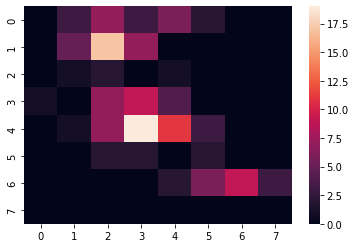

In [ ]:
sns.heatmap(cnff)

In [ ]:
FP = cnff.sum(axis=0) - np.diag(cnff) 
FN = cnff.sum(axis=1) - np.diag(cnff)
TP = np.diag(cnff)
TN = cnff.sum() - (FP + FN + TP)

In [ ]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [ ]:
TPR = TP/(TP+FN)
TPR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.        , 0.17241379, 0.5       , 0.42857143, 0.26829268,
       0.33333333, 0.45      ,        nan])

In [ ]:
TNR = TN/(TN+FP)
TNR

array([0.99173554, 0.95575221, 0.71014493, 0.74380165, 0.87128713,
       0.91911765, 1.        , 0.97887324])

In [ ]:
ACC = (TP+TN)/(TP+FP+FN+TN)
ACC

array([0.84507042, 0.79577465, 0.70422535, 0.6971831 , 0.6971831 ,
       0.8943662 , 0.92253521, 0.97887324])

In [ ]:
FPR = FP/(FP+TN)
FPR

array([0.00826446, 0.04424779, 0.28985507, 0.25619835, 0.12871287,
       0.08088235, 0.        , 0.02112676])

In [ ]:
from scipy import interp

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [ ]:
y_pred_again = model_1.predict(test_x).ravel()

In [ ]:
y_pred_again

array([4.1291857 , 4.121674  , 2.3664842 , 5.2271194 , 3.3534122 ,
       7.081689  , 5.067399  , 3.5022802 , 3.856557  , 5.5365124 ,
       4.7773886 , 3.670117  , 2.7166557 , 3.5324888 , 2.7367282 ,
       4.293656  , 4.064433  , 3.667357  , 3.930902  , 5.9609222 ,
       3.566073  , 5.6399097 , 2.066349  , 3.083696  , 2.830524  ,
       4.5736976 , 4.6758475 , 4.0473204 , 3.4947133 , 3.2907877 ,
       5.1028614 , 4.585655  , 4.183039  , 5.252819  , 1.547101  ,
       3.8862238 , 3.0107675 , 3.9345312 , 4.620603  , 3.3360538 ,
       2.8063607 , 2.5029202 , 2.7403002 , 2.669633  , 5.1722107 ,
       3.6217418 , 6.1635084 , 7.0807247 , 3.0608287 , 2.7166572 ,
       4.3259525 , 5.1810846 , 4.091818  , 3.412449  , 4.045984  ,
       4.574324  , 5.9848585 , 4.989578  , 2.2700753 , 2.7235284 ,
       4.4440947 , 7.793665  , 5.747602  , 3.744368  , 1.9684223 ,
       4.4330454 , 2.5814633 , 3.6592002 , 3.109599  , 7.3252583 ,
       3.8783154 , 6.047952  , 3.187574  , 3.8375702 , 3.52621

In [ ]:
y_pred_again=y_pred_again.astype(int)

In [ ]:
y_pred_again

array([4, 4, 2, 5, 3, 7, 5, 3, 3, 5, 4, 3, 2, 3, 2, 4, 4, 3, 3, 5, 3, 5,
       2, 3, 2, 4, 4, 4, 3, 3, 5, 4, 4, 5, 1, 3, 3, 3, 4, 3, 2, 2, 2, 2,
       5, 3, 6, 7, 3, 2, 4, 5, 4, 3, 4, 4, 5, 4, 2, 2, 4, 7, 5, 3, 1, 4,
       2, 3, 3, 7, 3, 6, 3, 3, 3, 3, 3, 3, 2, 3, 4, 2, 4, 4, 6, 2, 6, 2,
       7, 5, 2, 3, 4, 5, 3, 7, 2, 2, 7, 4, 3, 5, 4, 3, 3, 8, 2, 3, 7, 2,
       2, 4, 6, 0, 3, 4, 3, 4, 3, 5, 2, 2, 2, 3, 3, 5, 5, 4, 4, 6, 3, 2,
       4, 3, 4, 2, 4, 2, 1, 7, 2, 6])

In [ ]:
y_pred_again_class1=np.copy(y_pred_again)
y_pred_again_class2=np.copy(y_pred_again)
y_pred_again_class3=np.copy(y_pred_again)
y_pred_again_class4=np.copy(y_pred_again)
y_pred_again_class5=np.copy(y_pred_again)
y_pred_again_class6=np.copy(y_pred_again)
y_pred_again_class7=np.copy(y_pred_again)

In [ ]:
y_pred_again_class1[y_pred_again_class1 > 1]=0
y_pred_again_class1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_pred_again_class2[y_pred_again_class2 > 2]=0
y_pred_again_class2[y_pred_again_class2 < 2]=0
y_pred_again_class2[y_pred_again_class2==2]=1
y_pred_again_class2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [ ]:
y_pred_again_class3[y_pred_again_class3 > 3]=0
y_pred_again_class3[y_pred_again_class3 < 3]=0
y_pred_again_class3[y_pred_again_class3==3]=1
y_pred_again_class3

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_again_class4[y_pred_again_class4 > 4]=0
y_pred_again_class4[y_pred_again_class4 < 4]=0
y_pred_again_class4[y_pred_again_class4==4]=1
y_pred_again_class4

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
y_pred_again_class5[y_pred_again_class5 > 5]=0
y_pred_again_class5[y_pred_again_class5 < 5]=0
y_pred_again_class5[y_pred_again_class5==5]=1
y_pred_again_class5

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_again_class6[y_pred_again_class6 > 6]=0
y_pred_again_class6[y_pred_again_class6 < 6]=0
y_pred_again_class6[y_pred_again_class6==6]=1
y_pred_again_class6

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
y_pred_again_class7[y_pred_again_class7 > 7]=0
y_pred_again_class7[y_pred_again_class7 < 7]=0
y_pred_again_class7[y_pred_again_class7==7]=1
y_pred_again_class7

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
#keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_pred_again_class0, y_pred_again_class1)
#auc_keras=auc(nn_fpr_keras, nn_tpr_keras)
#plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [ ]:
from sklearn.metrics import roc_curve
fpr_keras_12, tpr_keras_12, thresholds_keras_12 = roc_curve(y_pred_again_class1, y_pred_again_class2)

In [ ]:
from sklearn.metrics import auc
auc_keras_12 = auc(fpr_keras_12, tpr_keras_12)

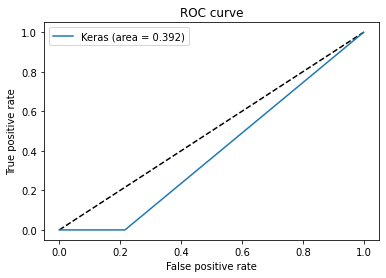

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_12, tpr_keras_12, label='Keras (area = {:.3f})'.format(auc_keras_12))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

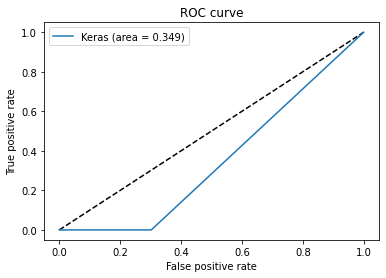

In [ ]:
fpr_keras_13, tpr_keras_13, thresholds_keras_13 = roc_curve(y_pred_again_class1, y_pred_again_class3)
auc_keras_13 = auc(fpr_keras_13, tpr_keras_13)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_13, tpr_keras_13, label='Keras (area = {:.3f})'.format(auc_keras_13))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

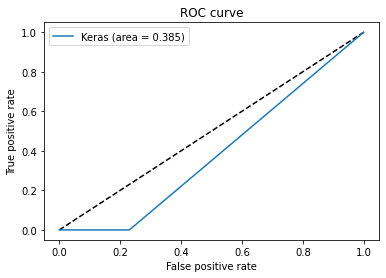

In [ ]:
fpr_keras_14, tpr_keras_14, thresholds_keras_14 = roc_curve(y_pred_again_class1, y_pred_again_class4)
auc_keras_14 = auc(fpr_keras_14, tpr_keras_14)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_14, tpr_keras_14, label='Keras (area = {:.3f})'.format(auc_keras_14))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

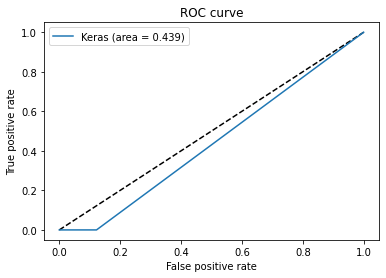

In [ ]:
fpr_keras_15, tpr_keras_15, thresholds_keras_15 = roc_curve(y_pred_again_class1, y_pred_again_class5)
auc_keras_15 = auc(fpr_keras_15, tpr_keras_15)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_15, tpr_keras_15, label='Keras (area = {:.3f})'.format(auc_keras_15))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

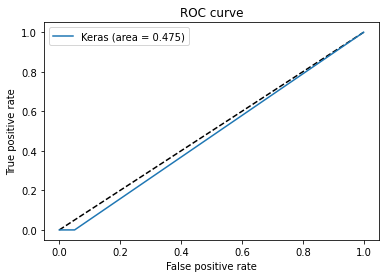

In [ ]:
fpr_keras_16, tpr_keras_16, thresholds_keras_16 = roc_curve(y_pred_again_class1, y_pred_again_class6)
auc_keras_16 = auc(fpr_keras_16, tpr_keras_16)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_16, tpr_keras_16, label='Keras (area = {:.3f})'.format(auc_keras_16))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

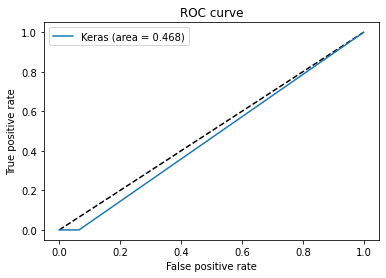

In [ ]:
fpr_keras_17, tpr_keras_17, thresholds_keras_17 = roc_curve(y_pred_again_class1, y_pred_again_class7)
auc_keras_17 = auc(fpr_keras_17, tpr_keras_17)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_17, tpr_keras_17, label='Keras (area = {:.3f})'.format(auc_keras_17))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

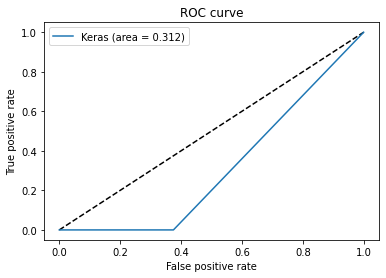

In [ ]:
fpr_keras_23, tpr_keras_23, thresholds_keras_23 = roc_curve(y_pred_again_class2, y_pred_again_class3)
auc_keras_23 = auc(fpr_keras_23, tpr_keras_23)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_23, tpr_keras_23, label='Keras (area = {:.3f})'.format(auc_keras_23))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

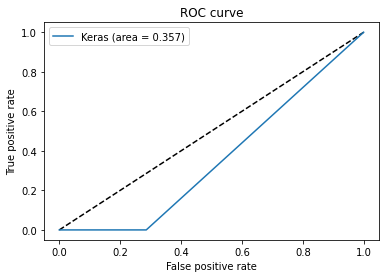

In [ ]:
fpr_keras_24, tpr_keras_24, thresholds_keras_24 = roc_curve(y_pred_again_class2, y_pred_again_class4)
auc_keras_24 = auc(fpr_keras_24, tpr_keras_24)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_24, tpr_keras_24, label='Keras (area = {:.3f})'.format(auc_keras_24))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

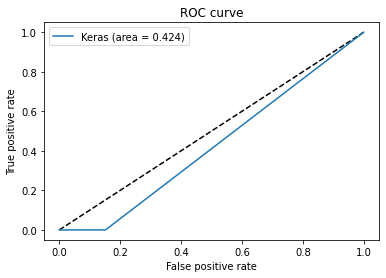

In [ ]:
fpr_keras_25, tpr_keras_25, thresholds_keras_25 = roc_curve(y_pred_again_class2, y_pred_again_class5)
auc_keras_25 = auc(fpr_keras_25, tpr_keras_25)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_25, tpr_keras_25, label='Keras (area = {:.3f})'.format(auc_keras_25))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

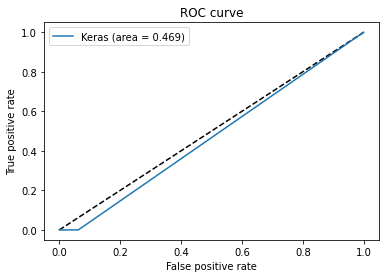

In [ ]:
fpr_keras_26, tpr_keras_26, thresholds_keras_26 = roc_curve(y_pred_again_class2, y_pred_again_class6)
auc_keras_26 = auc(fpr_keras_26, tpr_keras_26)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_26, tpr_keras_26, label='Keras (area = {:.3f})'.format(auc_keras_26))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

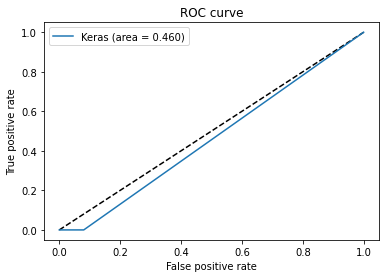

In [ ]:
fpr_keras_27, tpr_keras_27, thresholds_keras_27 = roc_curve(y_pred_again_class2, y_pred_again_class7)
auc_keras_27 = auc(fpr_keras_27, tpr_keras_27)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_27, tpr_keras_27, label='Keras (area = {:.3f})'.format(auc_keras_27))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

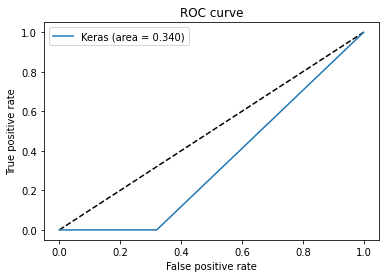

In [ ]:
fpr_keras_34, tpr_keras_34, thresholds_keras_34 = roc_curve(y_pred_again_class3, y_pred_again_class4)
auc_keras_34 = auc(fpr_keras_34, tpr_keras_34)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_34, tpr_keras_34, label='Keras (area = {:.3f})'.format(auc_keras_34))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

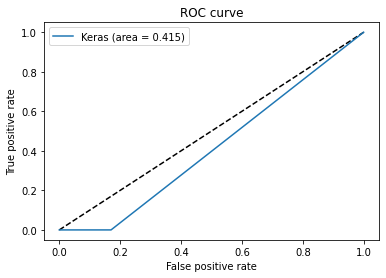

In [ ]:
fpr_keras_35, tpr_keras_35, thresholds_keras_35 = roc_curve(y_pred_again_class3, y_pred_again_class5)
auc_keras_35 = auc(fpr_keras_35, tpr_keras_35)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_35, tpr_keras_35, label='Keras (area = {:.3f})'.format(auc_keras_35))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

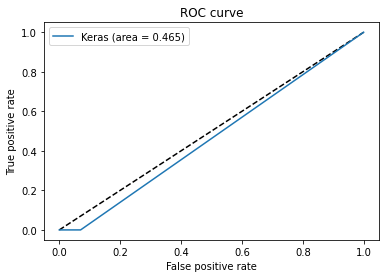

In [ ]:
fpr_keras_36, tpr_keras_36, thresholds_keras_36 = roc_curve(y_pred_again_class3, y_pred_again_class6)
auc_keras_36 = auc(fpr_keras_36, tpr_keras_36)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_36, tpr_keras_36, label='Keras (area = {:.3f})'.format(auc_keras_36))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

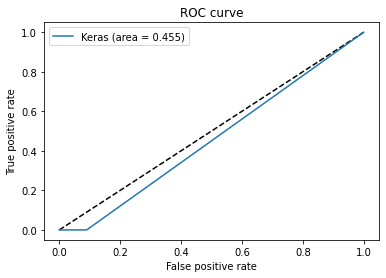

In [ ]:
fpr_keras_37, tpr_keras_37, thresholds_keras_37 = roc_curve(y_pred_again_class3, y_pred_again_class7)
auc_keras_37 = auc(fpr_keras_37, tpr_keras_37)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_37, tpr_keras_37, label='Keras (area = {:.3f})'.format(auc_keras_37))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

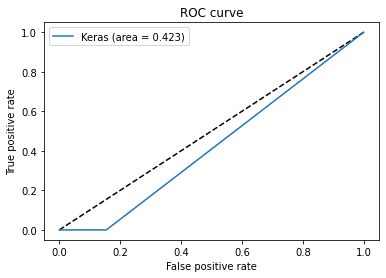

In [ ]:
fpr_keras_45, tpr_keras_45, thresholds_keras_45 = roc_curve(y_pred_again_class4, y_pred_again_class5)
auc_keras_45 = auc(fpr_keras_45, tpr_keras_45)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_45, tpr_keras_45, label='Keras (area = {:.3f})'.format(auc_keras_45))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

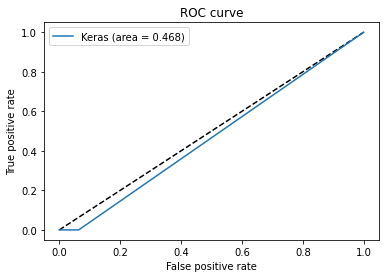

In [ ]:
fpr_keras_46, tpr_keras_46, thresholds_keras_46 = roc_curve(y_pred_again_class4, y_pred_again_class6)
auc_keras_46 = auc(fpr_keras_46, tpr_keras_46)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_46, tpr_keras_46, label='Keras (area = {:.3f})'.format(auc_keras_46))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

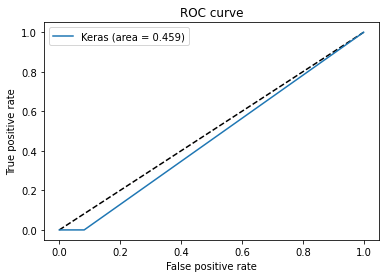

In [ ]:
fpr_keras_47, tpr_keras_47, thresholds_keras_47 = roc_curve(y_pred_again_class4, y_pred_again_class7)
auc_keras_47 = auc(fpr_keras_47, tpr_keras_47)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_47, tpr_keras_47, label='Keras (area = {:.3f})'.format(auc_keras_47))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

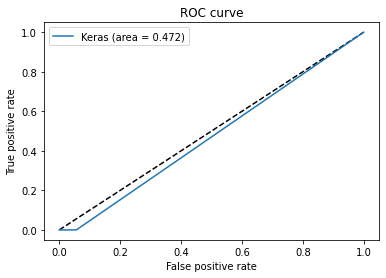

In [ ]:
fpr_keras_56, tpr_keras_56, thresholds_keras_56 = roc_curve(y_pred_again_class5, y_pred_again_class6)
auc_keras_56 = auc(fpr_keras_56, tpr_keras_56)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_56, tpr_keras_56, label='Keras (area = {:.3f})'.format(auc_keras_56))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

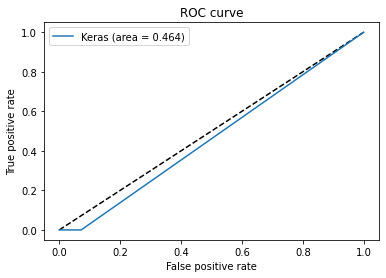

In [ ]:
fpr_keras_57, tpr_keras_57, thresholds_keras_57 = roc_curve(y_pred_again_class5, y_pred_again_class7)
auc_keras_57 = auc(fpr_keras_57, tpr_keras_57)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_57, tpr_keras_57, label='Keras (area = {:.3f})'.format(auc_keras_57))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

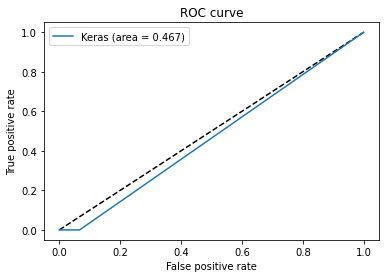

In [ ]:
fpr_keras_67, tpr_keras_67, thresholds_keras_67 = roc_curve(y_pred_again_class6, y_pred_again_class7)
auc_keras_67 = auc(fpr_keras_67, tpr_keras_67)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_67, tpr_keras_67, label='Keras (area = {:.3f})'.format(auc_keras_67))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()